# Analysis of Human data


## Survey

In [3]:
# Pretest results
import pandas as pd

# get true order hidden from participants
# group 2, group 3, group 4 - order 1
with open('../data/survey_samples/pilot_survey_samples_group2_order1_true_order.csv', 'r') as f:
    group_2_order_1 = f.readlines()
with open('../data/survey_samples/pilot_survey_samples_group3_order1_true_order.csv', 'r') as f:
    group_3_order_1 = f.readlines()
with open('../data/survey_samples/pilot_survey_samples_group4_order1_true_order.csv', 'r') as f:
    group_4_order_1 = f.readlines()

# group 2, group 3, group 4 - order 2
with open('../data/survey_samples/pilot_survey_samples_group2_order2_true_order.csv', 'r') as f:
    group_2_order_2 = f.readlines()
with open('../data/survey_samples/pilot_survey_samples_group3_order2_true_order.csv', 'r') as f:
    group_3_order_2 = f.readlines()
with open('../data/survey_samples/pilot_survey_samples_group4_order2_true_order.csv', 'r') as f:
    group_4_order_2 = f.readlines()

likert_7_scale = {
    '1': 'Strongly Disagree',
    '2': 'Disagree',
    '3': 'Somewhat Disagree',
    '4': 'Neither Agree nor Disagree',
    '5': 'Somewhat Agree',
    '6': 'Agree',
    '7': 'Strongly Agree'
}
# reverse the likert scale
reverse_likert_7_scale = {
    v: int(k) for k, v in likert_7_scale.items()
}
question_types = {
    'The main passage is written as if the new fact is true': 'Edit consistency',
    'The related passage does not contradict the new fact': 'Edit consistency',
    'Ignoring the new fact, most of the old facts are still true in the main passage.': 'Factual consistency',
    'Ignoring the new fact, most of the old facts are still true in the related passage.': 'Factual consistency',
    'Ignoring the old and new facts, the main passage does not contradict itself.': 'Internal consistency',
    'Ignoring the old and new facts, the related passage does not contradict itself.': 'Internal consistency',
    'Ignoring the old and new facts, the main passage and the related passage do not contradict each other.' : 'Cross passage consistency',
    'The main passage is focused on the subject and the related passage is focused on the related entity': 'Topicality',
    'Both passages are natural sounding text close to what a human would write.': 'Naturalness'
}

def _merge_responses_with_true_order(
    filename,
    true_order,
    participant_id
):
    responses = []
    with open(filename, 'r') as f:
        columns = []
        lines = f.readlines()
        columns = lines[0].split('\t')
        # columns 1 to 9 are the questions
        questions = columns[1:]
        first_question = questions[0]
        for i, line in enumerate(lines[1:]):
            participant_no = i
            sample_id = true_order[0]
            question_index = 0
            true_order_idx = 0
            for j, response in enumerate(line.split('\t')):
                if j == 0:
                    continue
                question = questions[question_index]
                if j != 1 and question == first_question:
                    # get the next sample_id
                    true_order_idx += 1
                    sample_id = true_order[
                        true_order_idx
                    ]
                
                method, samp_id = sample_id.replace(
                    'no_edit', 'noedit'
                ).split('_')
                responses.append(
                    {
                        'participant_id': participant_id.replace(' ', '_').strip() + "_" + str(participant_no),
                        'sample_id': samp_id.strip(),
                        'method': method.strip().replace(
                            'noedit', 'no_edit'
                        ),
                        'question': question.replace('[Answer]', '').strip(),
                        'response': reverse_likert_7_scale[response.strip()],
                        'question_type': question_types[question.replace('[Answer]', '').strip()],
                    }
                )
                question_index += 1
    return responses

group_2_order_1_responses = _merge_responses_with_true_order(
    '../results/AI Text Generation Fact Changing Survey (Group 2 Order 1) (Responses) - Form Responses 1.tsv',
    group_2_order_1,
    'Group 2 Order 1'
)
group_2_order_1_df = pd.DataFrame(group_2_order_1_responses)
group_3_order_1_responses = _merge_responses_with_true_order(
    '../results/AI Text Generation Fact Changing Survey (Group 3 Order 1) (Responses) - Form Responses 1.tsv',
    group_3_order_1,
    'Group 3 Order 1'
)
group_3_order_1_df = pd.DataFrame(group_3_order_1_responses)
group_4_order_1_responses = _merge_responses_with_true_order(
    '../results/AI Text Generation Fact Changing Survey (Group 4 Order 1) (Responses) - Form Responses 1.tsv',
    group_4_order_1,
    'Group 4 Order 1'
)
group_4_order_1_df = pd.DataFrame(group_4_order_1_responses)


group_2_order_2_responses = _merge_responses_with_true_order(
    '../results/AI Text Generation Fact Changing Survey (Group 2 Order 2) (Responses) - Form Responses 1.tsv',
    group_2_order_2,
    'Group 2 Order 2'
)
group_2_order_2_df = pd.DataFrame(group_2_order_2_responses)
group_3_order_2_responses = _merge_responses_with_true_order(
    '../results/AI Text Generation Fact Changing Survey (Group 3 Order 1) (Responses) - Form Responses 1.tsv',
    group_3_order_1,
    'Group 3 Order 2'
)
group_3_order_2_df = pd.DataFrame(group_3_order_2_responses)
group_4_order_2_responses = _merge_responses_with_true_order(
    '../results/AI Text Generation Fact Changing Survey (Group 4 Order 2) (Responses) - Form Responses 1.tsv',
    group_4_order_2,
    'Group 4 Order 2'
)
group_4_order_2_df = pd.DataFrame(group_4_order_2_responses)


responses_df = pd.concat(
    [
        group_2_order_1_df,
        group_3_order_1_df,
        group_4_order_1_df,
        group_2_order_2_df,
        group_3_order_2_df,
        group_4_order_2_df,
    ]
)
responses_df.to_csv('../results/human_survey_responses.csv', index=False)
responses_df.sort_values(
    by=['participant_id', 'sample_id', 'method', 'question'],
    inplace=True
)

### Characterization of data collected

In [4]:
responses_df = pd.read_csv('../results/human_survey_responses.csv')
responses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  486 non-null    object
 1   sample_id       486 non-null    object
 2   method          486 non-null    object
 3   question        486 non-null    object
 4   response        486 non-null    int64 
 5   question_type   486 non-null    object
dtypes: int64(1), object(5)
memory usage: 22.9+ KB


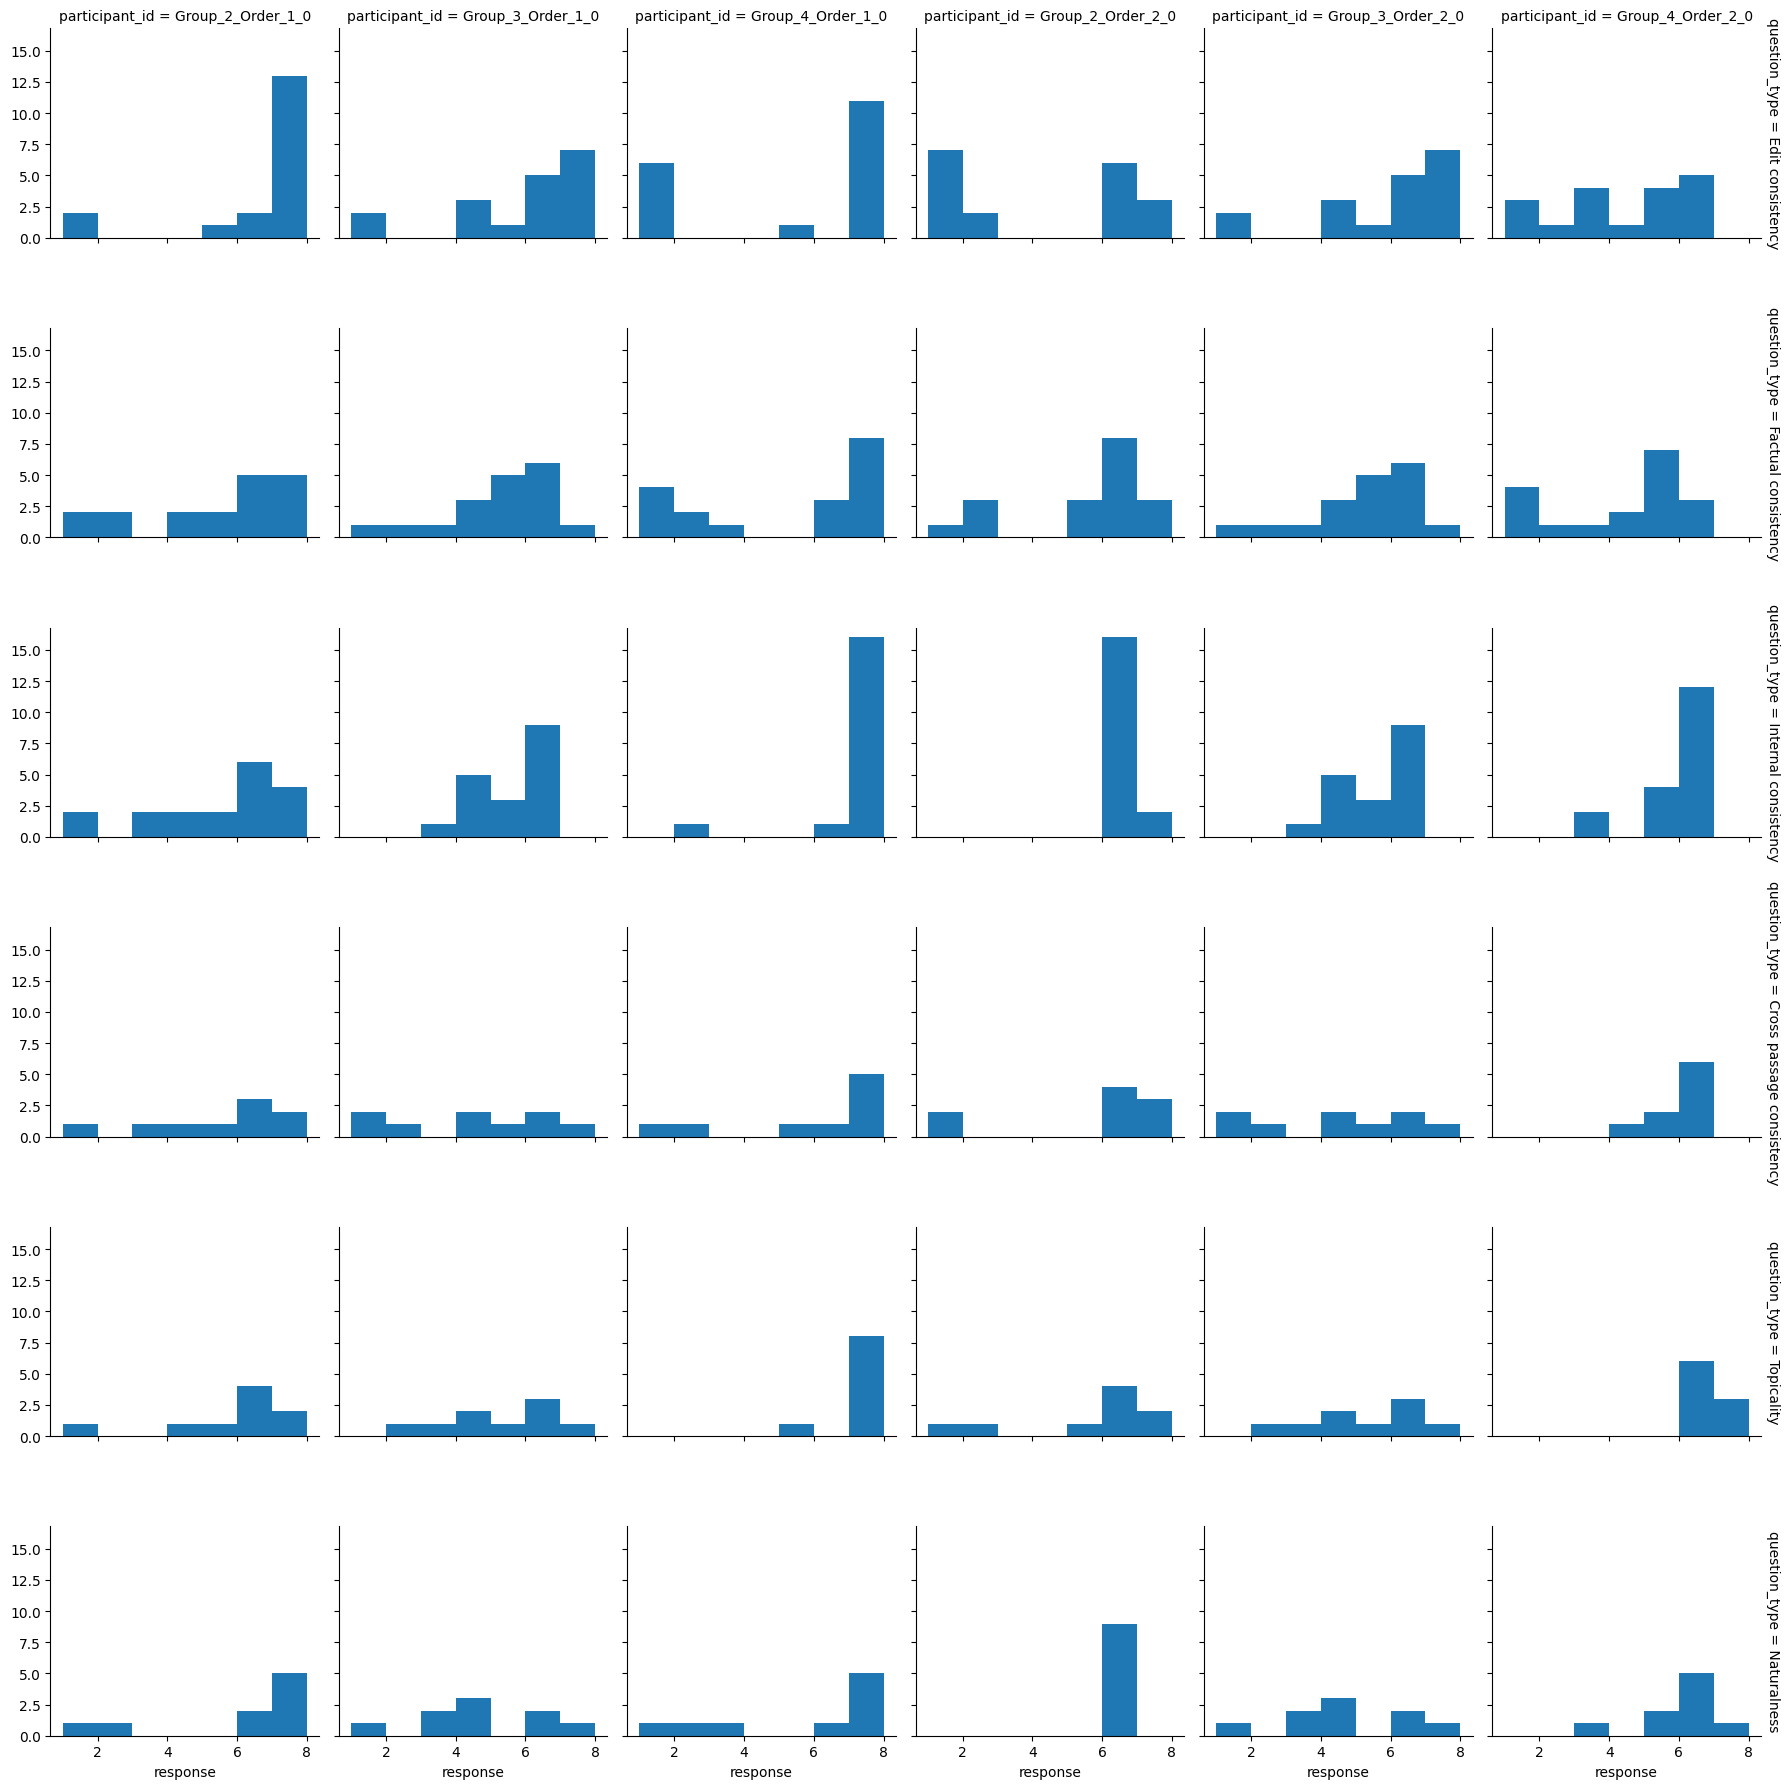

In [5]:
# hist grid
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# plot response distribution
grid = sns.FacetGrid(responses_df, col='participant_id', row='question_type', margin_titles=True)
grid.map(plt.hist, 'response', bins=np.arange(1, 9, 1))

In [6]:
question_order = [
    'The main passage is written as if the new fact is true',
    'The related passage does not contradict the new fact',
    'Ignoring the new fact, most of the old facts are still true in the main passage.',
    'Ignoring the new fact, most of the old facts are still true in the related passage.',
    'Ignoring the old and new facts, the main passage does not contradict itself.',
    'Ignoring the old and new facts, the related passage does not contradict itself.',
    'Ignoring the old and new facts, the main passage and the related passage do not contradict each other.',
    'The main passage is focused on the subject and the related passage is focused on the related entity',
    'Both passages are natural sounding text close to what a human would write.'
]
method_order = [
    'no_edit',
    'rome',
    'human'
]

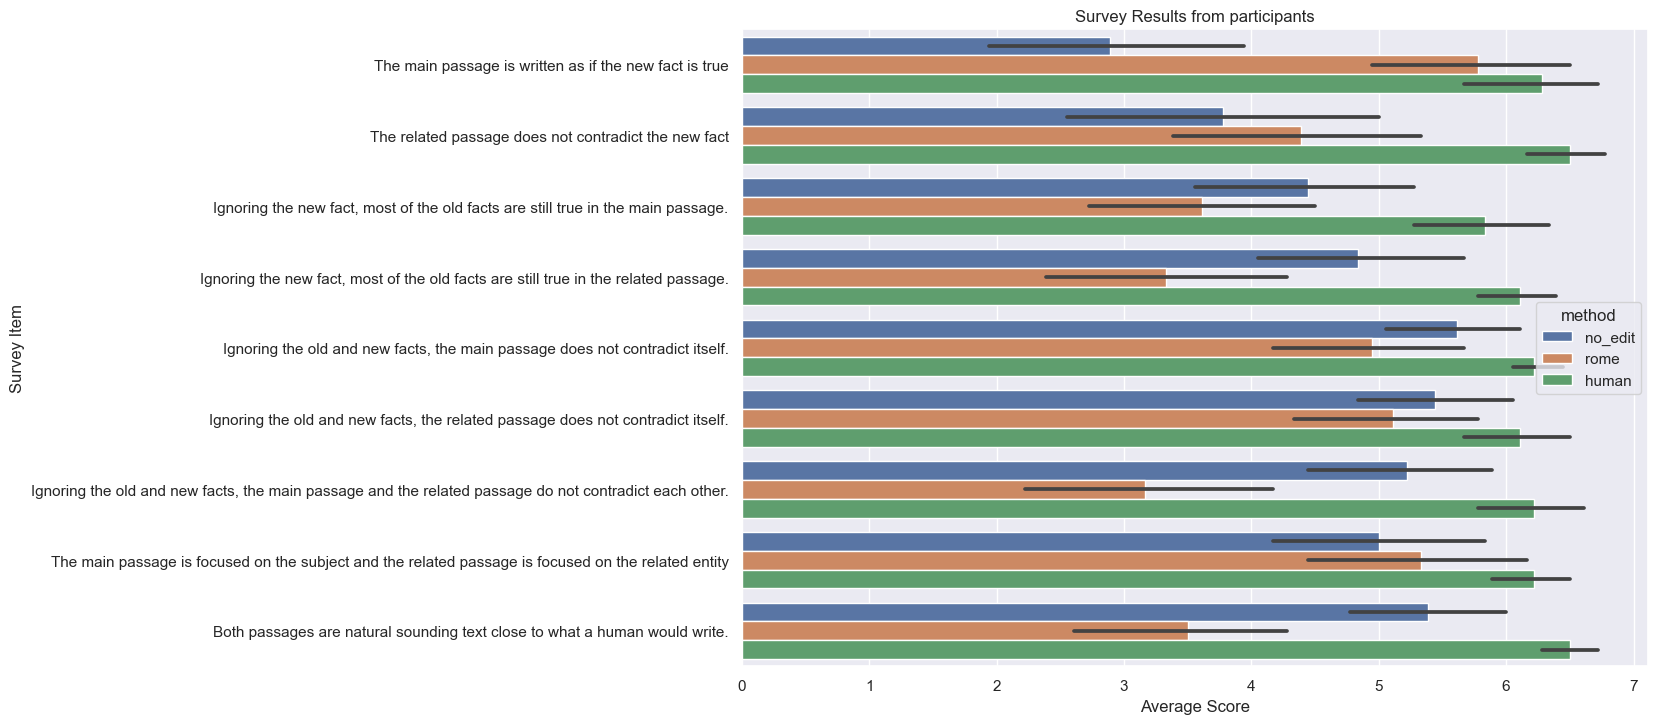

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="whitegrid")

# increase size of plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='response', y='question', hue='method', data=responses_df, orient = 'h', order=question_order, hue_order=method_order)
ax.set_title('Survey Results from participants')
ax.set_ylabel('Survey Item')
ax.set_xlabel('Average Score')

# save plot
fig = ax.get_figure()
fig.savefig('../results/survey_human_results_pilot.png', dpi=300, bbox_inches='tight')

In [8]:
import numpy as np
from scipy.stats import iqr
# get median and iqr
pvt = responses_df.pivot_table(index=['question_type', 'question'], columns=['method'], values='response', aggfunc=[np.mean, np.std])
# multple by 100 to get percentage

pvt = pvt.round(1).astype(str)
pvt = pvt['mean'] + '±' + pvt['std']
pvt.to_csv('../results/survey_human_results_table.csv')
pvt 

method                                                                          human  \
question_type             question                                                      
Cross passage consistency Ignoring the old and new facts, the main passag...  6.2±0.9   
Edit consistency          The main passage is written as if the new fact ...  6.3±1.2   
                          The related passage does not contradict the new...  6.5±0.7   
Factual consistency       Ignoring the new fact, most of the old facts ar...  5.8±1.2   
                          Ignoring the new fact, most of the old facts ar...  6.1±0.7   
Internal consistency      Ignoring the old and new facts, the main passag...  6.2±0.4   
                          Ignoring the old and new facts, the related pas...  6.1±0.9   
Naturalness               Both passages are natural sounding text close t...  6.5±0.5   
Topicality                The main passage is focused on the subject and ...  6.2±0.6   

method                                                                        no_edit  \
question_type             question                                                      
Cross passage consistency Ignoring the old and new facts, the main passag...  5.2±1.6   
Edit consistency          The main passage is written as if the new fact ...  2.9±2.4   
                          The related passage does not contradict the new...  3.8±2.7   
Factual consistency       Ignoring the new fact, most of the old facts ar...  4.4±1.9   
                          Ignoring the new fact, most of the old facts ar...  4.8±1.9   
Internal consistency      Ignoring the old and new facts, the main passag...  5.6±1.2   
                          Ignoring the old and new facts, the related pas...  5.4±1.3   
Naturalness               Both passages are natural sounding text close t...  5.4±1.4   
Topicality                The main passage is focused on the subject and ...  5.0±1.8   

method                                                                           rome  
question_type             question                                                     
Cross passage consistency Ignoring the old and new facts, the main passag...  3.2±2.2  
Edit consistency          The main passage is written as if the new fact ...  5.8±1.8  
                          The related passage does not contradict the new...  4.4±2.2  
Factual consistency       Ignoring the new fact, most of the old facts ar...  3.6±2.1  
                          Ignoring the new fact, most of the old facts ar...  3.3±2.1  
Internal consistency      Ignoring the old and new facts, the main passag...  4.9±1.6  
                          Ignoring the old and new facts, the related pas...  5.1±1.6  
Naturalness               Both passages are natural sounding text close t...  3.5±1.9  
Topicality                The main passage is focused on the subject and ...  5.3±2.0

In [9]:
import numpy as np
from scipy.stats import iqr
# get median and iqr
pvt = responses_df.pivot_table(index=['question_type'], columns=['method'], values='response', aggfunc=[np.mean, np.std])

pvt = pvt.round(1).astype(str)
pvt = pvt['mean'] + '±' + pvt['std']
pvt.to_csv('../results/survey_human_results_table_question_type.csv')
pvt

method,human,no_edit,rome
question_type,,,
Cross passage consistency,6.2±0.9,5.2±1.6,3.2±2.2
Edit consistency,6.4±1.0,3.3±2.6,5.1±2.1
Factual consistency,6.0±1.0,4.6±1.9,3.5±2.0
Internal consistency,6.2±0.7,5.5±1.2,5.0±1.6
Naturalness,6.5±0.5,5.4±1.4,3.5±1.9
Topicality,6.2±0.6,5.0±1.8,5.3±2.0


### Inter rater reliability

Text(0.5, 0, 'Order 1')

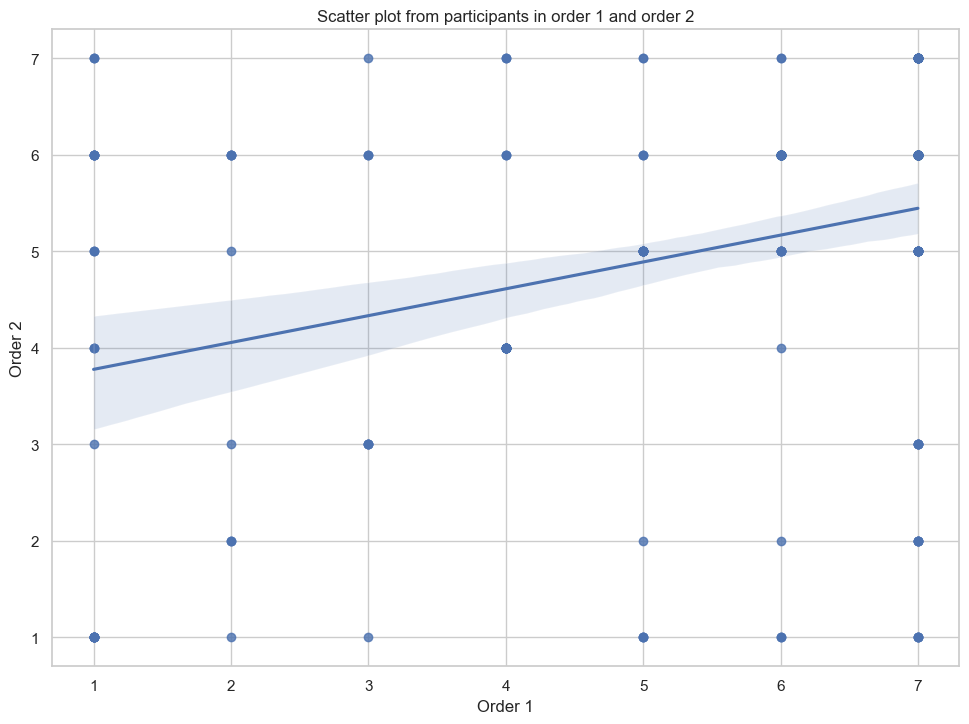

In [10]:
# scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# participants in order 1
order_1_responses = responses_df[responses_df['participant_id'].str.contains('Order_1')]['response']
order_2_responses = responses_df[responses_df['participant_id'].str.contains('Order_2')]['response']

# increase size of plot
ax = sns.regplot(x=list(order_1_responses), y=list(order_2_responses))
ax.set_title('Scatter plot from participants in order 1 and order 2')
ax.set_ylabel('Order 2')
ax.set_xlabel('Order 1')


In [11]:
# kendall tau
import scipy.stats as stats
stats.kendalltau(order_1_responses, order_2_responses)

KendalltauResult(correlation=0.27150332394961, pvalue=1.9654507650976508e-07)

In [12]:
for method in responses_df.method.unique():
    order_1_responses_tmp = responses_df.loc[
        (responses_df['participant_id'].str.contains('Order_1')) & (responses_df['method'] == method)
    ]['response']
    order_2_responses_tmp = responses_df.loc[
        (responses_df['participant_id'].str.contains('Order_2')) & (responses_df['method'] == method)
    ]['response']
    print(method)
    print(stats.kendalltau(order_1_responses_tmp, order_2_responses_tmp))


human
KendalltauResult(correlation=0.15198809874404753, pvalue=0.14199458250461974)
rome
KendalltauResult(correlation=0.2466247799771966, pvalue=0.005482364803392816)
no_edit
KendalltauResult(correlation=0.3154018848095586, pvalue=0.00042823816427959703)


In [13]:
for question_type in responses_df.question_type.unique():
    order_1_responses_tmp = responses_df.loc[
        (responses_df['participant_id'].str.contains('Order_1')) & (responses_df['question_type'] == question_type)
    ]['response']
    order_2_responses_tmp = responses_df.loc[
        (responses_df['participant_id'].str.contains('Order_2')) & (responses_df['question_type'] == question_type)
    ]['response']
    print(question_type)
    print(stats.kendalltau(order_1_responses_tmp, order_2_responses_tmp))


Edit consistency
KendalltauResult(correlation=0.20001665883307762, pvalue=0.07955196887445828)
Factual consistency
KendalltauResult(correlation=0.197112673055988, pvalue=0.07059822319904809)
Internal consistency
KendalltauResult(correlation=0.10332644431951492, pvalue=0.3821567754194196)
Cross passage consistency
KendalltauResult(correlation=0.3491881016726869, pvalue=0.027273800392400138)
Topicality
KendalltauResult(correlation=0.45817882677610283, pvalue=0.004920579115209385)
Naturalness
KendalltauResult(correlation=0.6005916581982437, pvalue=0.00024948947373725205)


In [14]:
for question in responses_df.question.unique():
    order_1_responses_tmp = responses_df.loc[
        (responses_df['participant_id'].str.contains('Order_1')) & (responses_df['question'] == question)
    ]['response']
    order_2_responses_tmp = responses_df.loc[
        (responses_df['participant_id'].str.contains('Order_2')) & (responses_df['question'] == question)
    ]['response']
    print(question)
    print(stats.kendalltau(order_1_responses_tmp, order_2_responses_tmp))


The main passage is written as if the new fact is true
KendalltauResult(correlation=0.0510338051442242, pvalue=0.7578375577534565)
The related passage does not contradict the new fact
KendalltauResult(correlation=0.36428709701965595, pvalue=0.024324759091120196)
Ignoring the new fact, most of the old facts are still true in the main passage.
KendalltauResult(correlation=0.11381746651234564, pvalue=0.4669964249584738)
Ignoring the new fact, most of the old facts are still true in the related passage.
KendalltauResult(correlation=0.25133592798496696, pvalue=0.10806775892108053)
Ignoring the old and new facts, the main passage does not contradict itself.
KendalltauResult(correlation=-0.0494081759904339, pvalue=0.7747231011420279)
Ignoring the old and new facts, the related passage does not contradict itself.
KendalltauResult(correlation=0.22569544752809692, pvalue=0.17836162514947673)
Ignoring the old and new facts, the main passage and the related passage do not contradict each other.
Ke

In [15]:
for method in responses_df.method.unique():
    for question in responses_df.question.unique():
        order_1_responses_tmp = responses_df.loc[
            (responses_df['participant_id'].str.contains('Order_1')) & (responses_df['question'] == question) & (responses_df['method'] == method)
        ]['response']
        order_2_responses_tmp = responses_df.loc[
            (responses_df['participant_id'].str.contains('Order_2')) & (responses_df['question'] == question) & (responses_df['method'] == method)
        ]['response']
        print(method, question)
        print(stats.kendalltau(order_1_responses_tmp, order_2_responses_tmp))
        print(krippendorff.alpha(
            np.array([
                order_1_responses_tmp,
                order_2_responses_tmp
            ]),
            level_of_measurement='interval'
        ))


human The main passage is written as if the new fact is true
KendalltauResult(correlation=0.0, pvalue=1.0)


NameError: name 'krippendorff' is not defined

In [ ]:
# calculate ICC
import pingouin as pg
responses_df['enhanced_sample_id'] = responses_df['sample_id'] + responses_df['method'] + responses_df['question']
pg.intraclass_corr(
    data=responses_df,
    targets='enhanced_sample_id',
    raters='participant_id',
    ratings='response'
)

/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1094: RuntimeWarning: divide by zero encountered in double_scalars
  fval_fac1 = ms_fac1 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1095: RuntimeWarning: divide by zero encountered in double_scalars
  fval_fac2 = ms_fac2 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1096: RuntimeWarning: divide by zero encountered in double_scalars
  fval_inter = ms_inter / ms_resid


,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.708367,15.573817,242,1215,1.419100e-247,"[0.66, 0.75]"
1,ICC2,Single random raters,0.709434,16.846137,242,1210,8.282553e-262,"[0.66, 0.75]"
2,ICC3,Single fixed raters,0.725352,16.846137,242,1210,8.282553e-262,"[0.68, 0.77]"
3,ICC1k,Average raters absolute,0.935790,15.573817,242,1215,1.419100e-247,"[0.92, 0.95]"
4,ICC2k,Average random raters,0.936100,16.846137,242,1210,8.282553e-262,"[0.92, 0.95]"
5,ICC3k,Average fixed raters,0.940639,16.846137,242,1210,8.282553e-262,"[0.93, 0.95]"


In [ ]:
# calculate ICC
import pingouin as pg

for method in responses_df.method.unique():
    for question in responses_df.question.unique():
        print(method, question)
        print(pg.intraclass_corr(
            data=responses_df.loc[
                (responses_df['question'] == question) & (responses_df['method'] == method)
            ],
            targets='sample_id',
            raters='participant_id',
            ratings='response'
        ))

/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1094: RuntimeWarning: divide by zero encountered in double_scalars
  fval_fac1 = ms_fac1 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1095: RuntimeWarning: divide by zero encountered in double_scalars
  fval_fac2 = ms_fac2 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1096: RuntimeWarning: divide by zero encountered in double_scalars
  fval_inter = ms_inter / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1094: RuntimeWarning: divide by zero encountered in double_scalars
  fval_fac1 = ms_fac1 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1095: Runtime

human The main passage is written as if the new fact is true
    Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.259813   3.106061    8   45   
1   ICC2     Single random raters  0.323077  12.812500    8   40   
2   ICC3      Single fixed raters  0.663158  12.812500    8   40   
3  ICC1k  Average raters absolute  0.678049   3.106061    8   45   
4  ICC2k    Average random raters  0.741176  12.812500    8   40   
5  ICC3k     Average fixed raters  0.921951  12.812500    8   40   

           pval         CI95%  
0  7.060726e-03  [0.04, 0.64]  
1  6.430362e-09  [0.08, 0.69]  
2  6.430362e-09   [0.4, 0.89]  
3  7.060726e-03   [0.2, 0.92]  
4  6.430362e-09  [0.35, 0.93]  
5  6.430362e-09   [0.8, 0.98]  
human The related passage does not contradict the new fact
    Type              Description       ICC     F  df1  df2     pval  \
0   ICC1   Single raters absolute  0.400000   5.0    8   45  0.00018   
1   ICC2     Single random raters  

/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1094: RuntimeWarning: divide by zero encountered in double_scalars
  fval_fac1 = ms_fac1 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1095: RuntimeWarning: divide by zero encountered in double_scalars
  fval_fac2 = ms_fac2 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1096: RuntimeWarning: divide by zero encountered in double_scalars
  fval_inter = ms_inter / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1094: RuntimeWarning: divide by zero encountered in double_scalars
  fval_fac1 = ms_fac1 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1095: Runtime

    Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.783459  22.708333    8   45   
1   ICC2     Single random raters  0.794872 -41.923077    8   40   
2   ICC3      Single fixed raters  1.162500 -41.923077    8   40   
3  ICC1k  Average raters absolute  0.955963  22.708333    8   45   
4  ICC2k    Average random raters  0.958763 -41.923077    8   40   
5  ICC3k     Average fixed raters  1.023853 -41.923077    8   40   

           pval         CI95%  
0  2.066033e-13  [0.58, 0.93]  
1  1.000000e+00  [0.17, 0.96]  
2  1.000000e+00  [1.52, 1.04]  
3  2.066033e-13  [0.89, 0.99]  
4  1.000000e+00  [0.56, 0.99]  
5  1.000000e+00  [1.06, 1.01]  
human The main passage is focused on the subject and the related passage is focused on the related entity
    Type              Description       ICC       F  df1  df2          pval  \
0   ICC1   Single raters absolute  0.847619  34.375    8   45  1.075663e-16   
1   ICC2     Single random raters  

/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1094: RuntimeWarning: divide by zero encountered in double_scalars
  fval_fac1 = ms_fac1 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1095: RuntimeWarning: divide by zero encountered in double_scalars
  fval_fac2 = ms_fac2 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1096: RuntimeWarning: divide by zero encountered in double_scalars
  fval_inter = ms_inter / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1094: RuntimeWarning: divide by zero encountered in double_scalars
  fval_fac1 = ms_fac1 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1095: Runtime

In [ ]:
# agreement scores

# calculate agreement within 1, 2, and 3 points
absolute_agreement = np.sum(order_1_responses == np.array(order_2_responses)) / len(order_1_responses)
agreement_within_one = np.sum(np.abs(order_1_responses - np.array(order_2_responses) <= 1)) / len(order_1_responses)
agreement_within_two = np.sum(np.abs(order_1_responses - np.array(order_2_responses) <= 2)) / len(order_1_responses)
agreement_within_three = np.sum(np.abs(order_1_responses - np.array(order_2_responses) <= 3)) / len(order_1_responses)

print(
    'Absolute Agreement: ', absolute_agreement
)
print(
    'Agreement within 1 point: ', agreement_within_one
)
print(
    'Agreement within 2 points: ', agreement_within_two
)
print(
    'Agreement within 3 points: ', agreement_within_three
)

Absolute Agreement:  0.43209876543209874
Agreement within 1 point:  0.8353909465020576
Agreement within 2 points:  0.8930041152263375
Agreement within 3 points:  0.897119341563786


In [ ]:
tmp = np.array(
    [
        order_1_responses,
        order_2_responses
    ]
)
krippendorff.alpha(
    tmp,
    level_of_measurement='interval'
)

0.16653146694838517

### Factor Analysis

In [27]:

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler

In [28]:
questions = []
for question in responses_df.question.unique():
    questions.append(
        responses_df.loc[
            responses_df['question'] == question
        ]['response'].values
    )


In [29]:
questions_idx = responses_df.question.unique()

In [36]:

X = StandardScaler().fit_transform(np.array(questions))
feature_names = questions_idx

/var/folders/hk/gjvj191n5k7gzt9tg0z8s3km0000gn/T/ipykernel_6220/974806638.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)


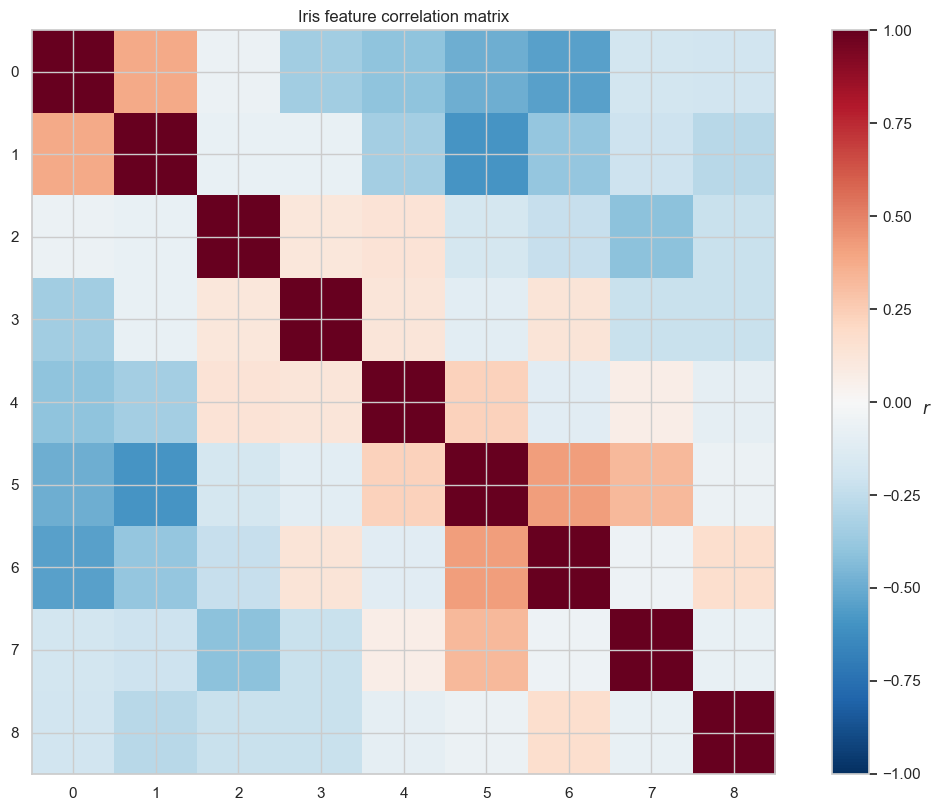

In [42]:
# factor analysis
ax = plt.axes()

im = ax.imshow(np.corrcoef(X), cmap="RdBu_r", vmin=-1, vmax=1)

# ax.set_xticks(np.arange(len(feature_names)))
# ax.set_xticklabels(list(feature_names), rotation=90)
# ax.set_yticks(np.arange(len(feature_names)))
# ax.set_yticklabels(list(feature_names))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Iris feature correlation matrix")
plt.tight_layout()

In [44]:
for i, question in enumerate(responses_df.question.unique()):
    print(i, question)

0 The main passage is written as if the new fact is true
1 The related passage does not contradict the new fact
2 Ignoring the new fact, most of the old facts are still true in the main passage.
3 Ignoring the new fact, most of the old facts are still true in the related passage.
4 Ignoring the old and new facts, the main passage does not contradict itself.
5 Ignoring the old and new facts, the related passage does not contradict itself.
6 Ignoring the old and new facts, the main passage and the related passage do not contradict each other.
7 The main passage is focused on the subject and the related passage is focused on the related entity
8 Both passages are natural sounding text close to what a human would write.


In [54]:
df = pd.DataFrame(questions).fillna(4)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,7,7,7,7,7,7,7,7,7,5,...,7,6,5,3,4,1,1,6,6,5
1,6,5,1,6,7,7,1,7,7,7,...,7,6,3,2,3,3,1,5,6,5
2,6,5,1,4,7,7,2,7,6,6,...,6,6,1,5,4,5,1,5,2,5
3,6,5,1,4,6,7,2,7,6,7,...,6,6,1,5,4,3,1,6,5,5
4,6,5,1,4,6,7,3,7,6,6,...,6,6,3,5,6,5,6,6,3,6


In [113]:
# factor analysis
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation=None, n_factors=4)
fa.fit(X.T)
fa.loadings_

array([[-0.73472919,  0.21365201, -0.17545486, -0.08966703],
       [-0.6723231 ,  0.05809627,  0.01637752, -0.25249057],
       [-0.16675359, -0.40555304,  0.34280836,  0.24082604],
       [ 0.10488976, -0.35307025,  0.31894285, -0.07409909],
       [ 0.31144929, -0.4070788 , -0.0487815 ,  0.41485002],
       [ 0.70864546, -0.12070023, -0.297567  , -0.03699018],
       [ 0.74179738,  0.16856032,  0.34876516, -0.55970537],
       [ 0.29498612,  0.09125291, -0.70755717, -0.00255534],
       [ 0.2786141 ,  0.81045427,  0.29387886,  0.44952699]])

In [102]:
fa.get_factor_variance()

(array([2.53732061, 1.23675181, 1.13288849, 0.87721548, 0.61725844]),
 array([0.28192451, 0.13741687, 0.1258765 , 0.09746839, 0.06858427]),
 array([0.28192451, 0.41934138, 0.54521788, 0.64268627, 0.71127054]))

In [103]:
fa.get_communalities()

array([1.03380979, 0.99749749, 0.4064923 , 0.2543979 , 0.36033404,
       0.56921164, 1.00863934, 0.75004543, 1.0210069 ])

### Statistical Tests for Significance


In [204]:
## Ordinal Logistic Regression

ANOVA

In [199]:
# anova
pg.kruskal(
    dv='response',
    between='method',
    data=responses_df
)

,Source,ddof1,H,p-unc
Kruskal,method,2,85.222274,3.120458e-19



Wilxocon test (one sided) for each question and method 
- Change to a Dunns test

In [17]:
import warnings
warnings.filterwarnings("ignore")

for method_1 in responses_df.method.unique():
    for method_2 in responses_df.method.unique():
        if method_1 == method_2:
            continue
        for question_type in responses_df.question_type.unique():
            method_1_responses_tmp = responses_df.loc[
                (responses_df['question_type'] == question_type) & (responses_df['method'] == method_1)
            ]['response']
            method_2_responses_tmp = responses_df.loc[
                (responses_df['question_type'] == question_type) & (responses_df['method'] == method_2)
            ]['response']

            
            effect_df = pg.wilcoxon(
                method_1_responses_tmp,
                method_2_responses_tmp,
                alternative='less'
            )
            if effect_df['p-val'].values[0] < 0.05:
                print(f"{method_1} is significantly less than {method_2} for {question_type}")
                print(effect_df)

rome is significantly less than human for Edit consistency
          W-val alternative     p-val       RBC      CLES
Wilcoxon   30.0        less  0.000141 -0.815385  0.692901
rome is significantly less than human for Factual consistency
          W-val alternative     p-val       RBC     CLES
Wilcoxon   44.0        less  0.000006 -0.852101  0.86034
rome is significantly less than human for Internal consistency
          W-val alternative     p-val  RBC      CLES
Wilcoxon    0.0        less  0.000044 -1.0  0.737654
rome is significantly less than human for Cross passage consistency
          W-val alternative     p-val  RBC      CLES
Wilcoxon    0.0        less  0.000512 -1.0  0.891975
rome is significantly less than human for Topicality
          W-val alternative     p-val       RBC      CLES
Wilcoxon    4.0        less  0.028119 -0.777778  0.592593
rome is significantly less than human for Naturalness
          W-val alternative     p-val  RBC      CLES
Wilcoxon    0.0        less  0

## Annotation Analysis

### Characterization of data collected

In [18]:
import json
import pandas as pd

gpt_35_annotations_human_path = '../results/annotations_llama2_chat_human_edit_pretest_annotation_gpt-3.5-turbo-0613.json'
gpt_35_annotations_human = json.load(open(gpt_35_annotations_human_path))

gpt_35_annotations_no_edit_path = '../results/annotations_llama2_chat_no_edit_pretest_annotation_gpt-3.5-turbo-0613.json'
gpt_35_annotations_no_edit = json.load(open(gpt_35_annotations_no_edit_path))

gpt_35_annotations_edit_path = '../results/annotations_llama2_chat_rome_edit_pretest_annotation_gpt-3.5-turbo-0613.json'
gpt_35_annotations_edit = json.load(open(gpt_35_annotations_edit_path))

gpt_35_df = pd.DataFrame(
    gpt_35_annotations_human + gpt_35_annotations_no_edit + gpt_35_annotations_edit
)

gpt_4_annotations_human_path = '../results/annotations_llama2_chat_human_edit_pretest_annotation_gpt-4.json'
gpt_4_annotations_human = json.load(open(gpt_4_annotations_human_path))

gpt_4_annotations_no_edit_path = '../results/annotations_llama2_chat_no_edit_pretest_annotation_gpt-4.json'
gpt_4_annotations_no_edit = json.load(open(gpt_4_annotations_no_edit_path))

gpt_4_annotations_edit_path = '../results/annotations_llama2_chat_rome_edit_pretest_annotation_gpt-4.json'
gpt_4_annotations_edit = json.load(open(gpt_4_annotations_edit_path))

gpt_4_df = pd.DataFrame(
    gpt_4_annotations_human + gpt_4_annotations_no_edit + gpt_4_annotations_edit
)

In [19]:
import json

with open('../data/annotation_data/longform_eval_first_3_samples_paragraph_annotations.json') as f:
    pretest = json.load(f)

intervention_map = {
    'human': 'llama2_chat_human_edit_pretest_annotation',
    'no_edit': 'llama2_chat_no_edit_pretest_annotation',
    'rome': 'llama2_chat_rome_edit_pretest_annotation'
}

anno_question_type = {
    'new_fact_and_main_passage': 'New fact is true',
    'new_fact_and_related_passage': 'New fact is true',
    'old_fact_and_main_passage': 'Old fact is true',
    'old_fact_and_related_passage': 'Old fact is true',
    'ground_truth_and_related_passage': 'Ground truth is true',
    'ground_truth_and_main_passage': 'Ground truth is true',
}

raters = {
    1: [],
    2: []
}
rating_to_number = {
    'supports': 2,
    'neutral': 1,
    'contradicts': 0
}
agreements = {
    1: 0,
    2: 0,
    3: 0,
    4: 0
}
agreements_by_class = {
    'contradicts': {
        1: 0,
        2: 0,
        3: 0,
        4: 0
    },
    'neutral': {
        1: 0,
        2: 0,
        3: 0,
        4: 0
    },
    'supports': {
        1: 0,
        2: 0,
        3: 0,
        4: 0
    }
}

ratings = []
for example in pretest['examples']:
    agreements[
        len(example['classifications'])
    ] += 1
    for rating in example['classifications']:
        for rater in rating['classified_by']:
            anon_id = rater['annotator_id']
            if anon_id not in raters:
                raters[anon_id] = []
            
            agreements_by_class[rating['classname']][len(example['classifications'])] += 1
            # added now just to simulate another rater
            raters[2].append(
                gpt_35_df.loc[
                    (gpt_35_df['content'] == example['content'])
                ]['classification'].values[0]
            )
            raters[1].append(
                rating['classname']
            )
            # raters[3].append(
            #     gpt_4_df.loc[
            #         (gpt_4_df['content'] == example['content'])
            #     ]['classification'].values[0]
            # )
            ratings.append({
                "rater": anon_id,
                "sample_id": example['metadata']['sample'],
                "classification": rating['classname'],
                "method": example['metadata']['intervention'],
                "label": example['metadata']['label'],
                'question_type': anno_question_type[
                    example['metadata']['label']
                ],
                "highlighted_sentences": [
                    anno['value'] for anno in 
                    example['annotations']
                ]
            })
            ratings.append({
                "rater": anon_id + 1,
                "sample_id": example['metadata']['sample'],
                "classification": gpt_35_df.loc[
                    (gpt_35_df['content'] == example['content'])
                ]['classification'].values[0],
                "method": example['metadata']['intervention'],
                "label": example['metadata']['label'],
                'question_type': anno_question_type[
                    example['metadata']['label']
                ],
                "highlighted_sentences": []
            })
            # ratings.append({
            #     "rater": anon_id + 2,
            #     "classification": gpt_4_df.loc[
            #         (gpt_35_df['content'] == example['content'])
            #     ]['classification'].values[0],
            #     "method": example['metadata']['intervention'],
            #     "label": example['metadata']['label'],
            #     'question_type': anno_question_type[
            #         example['metadata']['label']
            #     ]
            # })


annos_df = pd.DataFrame(ratings) 

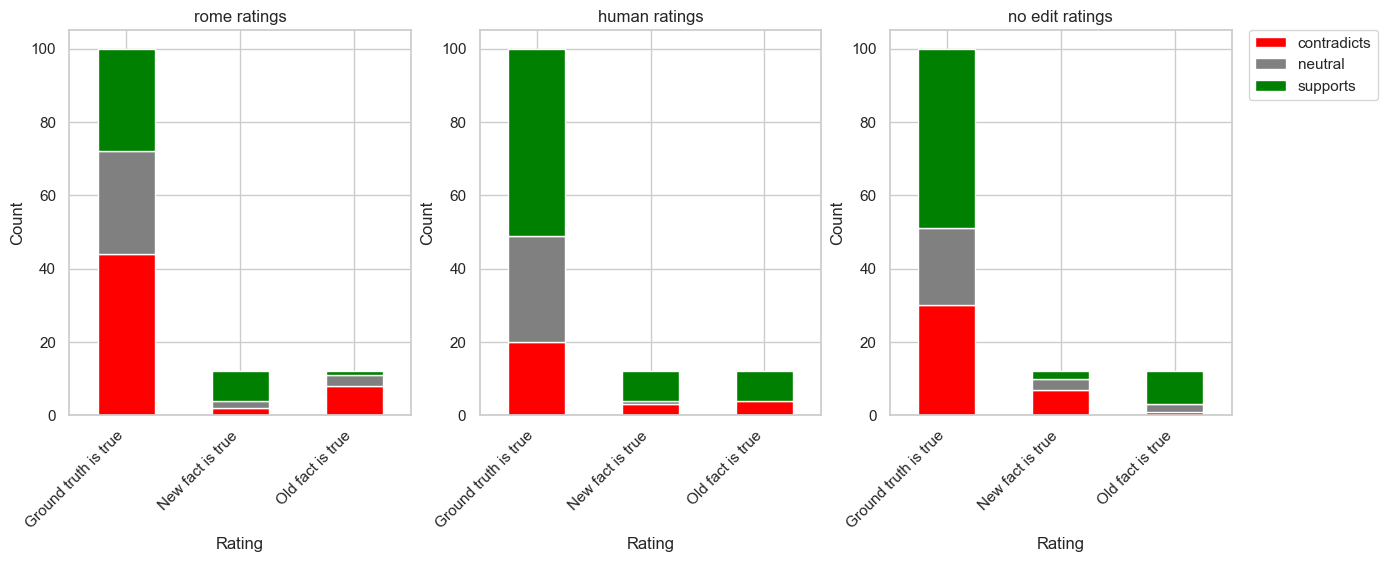

In [20]:
# bar graph of rating per class per method
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# create three subplots for each method on one plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, method in enumerate(annos_df['method'].unique()):
    ax = annos_df.loc[
        annos_df['method'] == method
    ].pivot_table(
        index=['question_type'],
        columns=['classification'],
        values='rater',
        aggfunc='count'
    ).plot(
        kind='bar',
        ax=axs[i],
        stacked=True,
        color=[
            'red', 'grey', 'green'
        ]
    )
    ax.set_title(f"{method.replace('_', ' ')} ratings")
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    # move legend outside of plot
    
    # delete other legends
    if i < 2:
        ax.get_legend().remove()
    else:
        ax.legend(
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            borderaxespad=0.
        )


In [21]:
def row_wise_normalise(df):
    return df.div(df.sum(axis=1), axis=0)

count_df = annos_df.pivot_table(
    index=['method', 'question_type'],
    columns=['classification'],
    values='rater',
    aggfunc='count'
)

count_df = row_wise_normalise(count_df)
count_df.fillna(0).round(2)

classification                contradicts  neutral  supports
method  question_type                                       
human   Ground truth is true         0.20     0.29      0.51
        New fact is true             0.25     0.08      0.67
        Old fact is true             0.33     0.00      0.67
no_edit Ground truth is true         0.30     0.21      0.49
        New fact is true             0.58     0.25      0.17
        Old fact is true             0.08     0.17      0.75
rome    Ground truth is true         0.44     0.28      0.28
        New fact is true             0.17     0.17      0.67
        Old fact is true             0.67     0.25      0.08

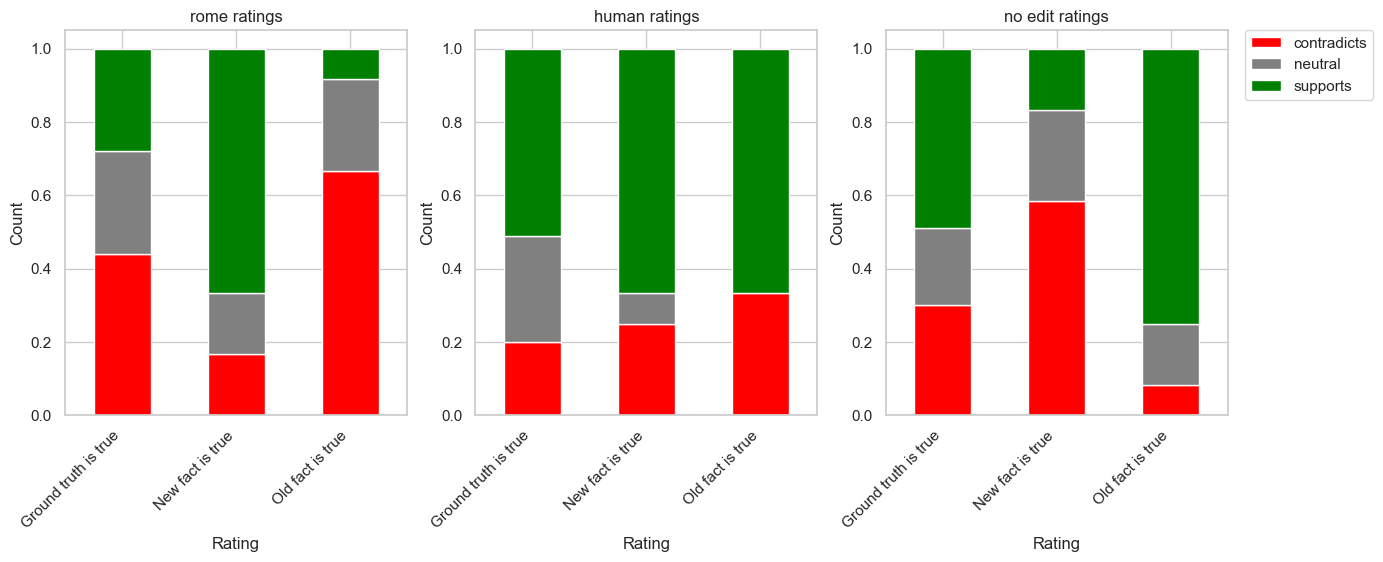

In [22]:
# bar graph of rating per class per method that is proportional
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# create three subplots for each method on one plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, method in enumerate(annos_df['method'].unique()):
    tmp_df = annos_df.loc[
        annos_df['method'] == method
    ].pivot_table(
        index=['question_type'],
        columns=['classification'],
        values='rater',
        aggfunc='count'
    )
    ax = row_wise_normalise(tmp_df).plot(
        kind='bar',
        ax=axs[i],
        stacked=True,
        color=[
            'red', 'grey', 'green'
        ]
    )
    ax.set_title(f"{method.replace('_', ' ')} ratings")
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    if i < 2:
        ax.get_legend().remove()
    else:
        ax.legend(
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            borderaxespad=0.
        )

In [23]:
# Characterize highlighted sentences by type and count
annos_df['highlighted_sentences_len'] = annos_df['highlighted_sentences'].apply(
    lambda x: len(x)
)
annos_df.pivot_table(
    index=['method', 'question_type'],
    columns=['classification'],
    values='highlighted_sentences_len',
    aggfunc='sum'
).round(2).fillna(0)[[
    'supports', 'contradicts'
]]


classification                supports  contradicts
method  question_type                              
human   Ground truth is true      26.0          2.0
        New fact is true           6.0          0.0
        Old fact is true           4.0          2.0
no_edit Ground truth is true      29.0          5.0
        New fact is true           1.0          4.0
        Old fact is true           6.0          0.0
rome    Ground truth is true      17.0         16.0
        New fact is true           9.0          0.0
        Old fact is true           1.0          5.0

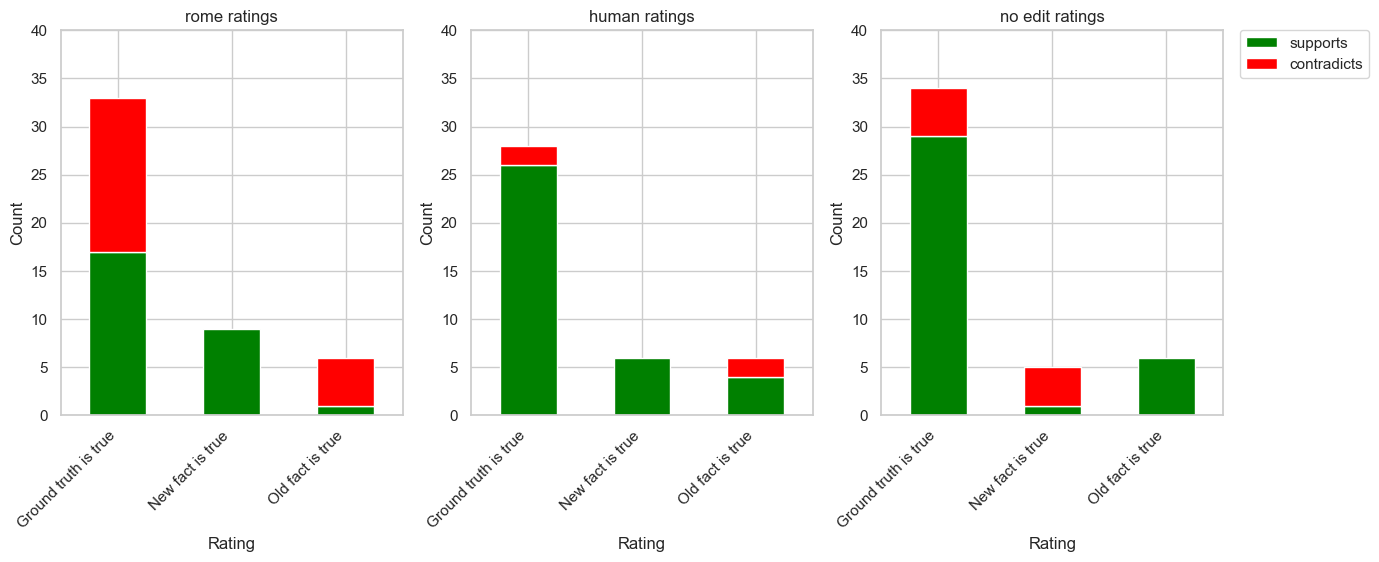

In [24]:
# bar graph of rating per class per method that is proportional
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# create three subplots for each method on one plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, method in enumerate(annos_df['method'].unique()):
    tmp_df = annos_df.loc[
        annos_df['method'] == method
    ].pivot_table(
        index=['question_type'],
        columns=['classification'],
        values='highlighted_sentences_len',
        aggfunc='sum'
    )[[
    'supports', 'contradicts'
]]

    ax = tmp_df.plot(
        kind='bar',
        ax=axs[i],
        stacked=True,
        color=[
            'green', 'red'
        ]
    )
    ax.set_title(f"{method.replace('_', ' ')} ratings")
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    # set y axis to be range 0 to 40
    ax.set_ylim([0, 40])
    if i < 2:
        ax.get_legend().remove()
    else:
        ax.legend(
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            borderaxespad=0.
        )

In [25]:
row_wise_normalise(annos_df.pivot_table(
    index=['method', 'question_type'],
    columns=['classification'],
    values='highlighted_sentences_len',
    aggfunc='sum'
).round(2).fillna(0))[
    ['supports', 'contradicts']
]

classification                supports  contradicts
method  question_type                              
human   Ground truth is true  0.928571     0.071429
        New fact is true      1.000000     0.000000
        Old fact is true      0.666667     0.333333
no_edit Ground truth is true  0.852941     0.147059
        New fact is true      0.200000     0.800000
        Old fact is true      1.000000     0.000000
rome    Ground truth is true  0.515152     0.484848
        New fact is true      1.000000     0.000000
        Old fact is true      0.166667     0.833333

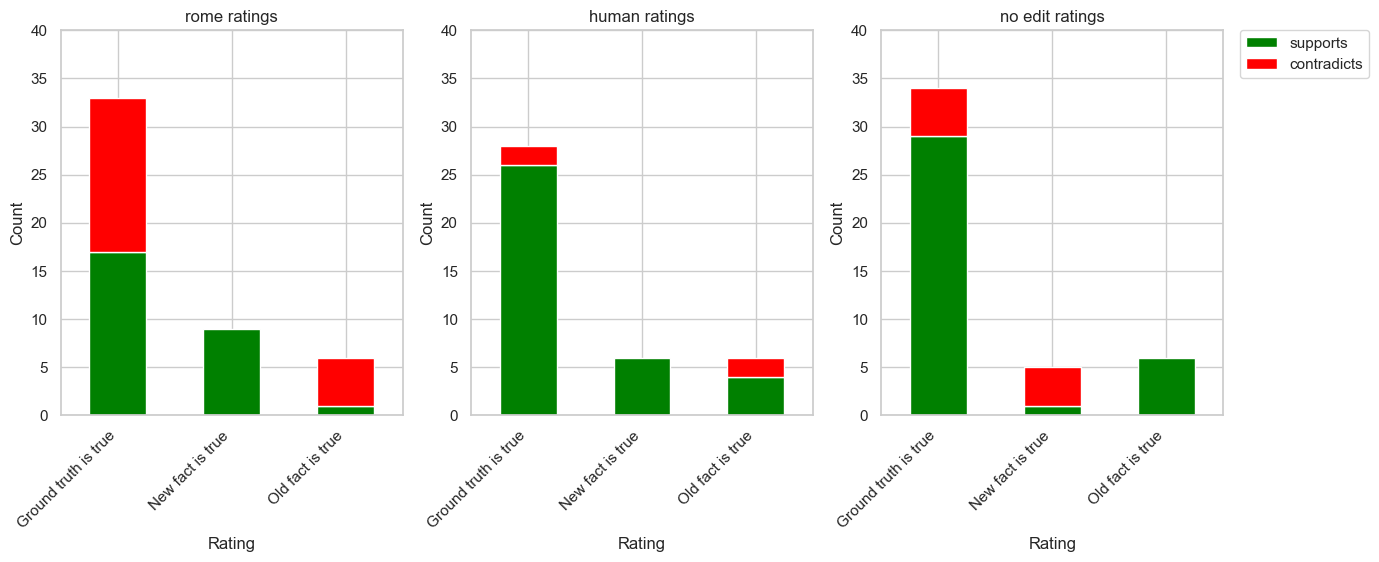

In [26]:
# bar graph of rating per class per method that is proportional
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# create three subplots for each method on one plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, method in enumerate(annos_df['method'].unique()):
    tmp_df = annos_df.loc[
        annos_df['method'] == method
    ].pivot_table(
        index=['question_type'],
        columns=['classification'],
        values='highlighted_sentences_len',
        aggfunc='sum'
    )[[
    'supports', 'contradicts'
]]

    ax = tmp_df.plot(
        kind='bar',
        ax=axs[i],
        stacked=True,
        color=[
            'green', 'red'
        ]
    )
    ax.set_title(f"{method.replace('_', ' ')} ratings")
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    # set y axis to be range 0 to 40
    ax.set_ylim([0, 40])
    if i < 2:
        ax.get_legend().remove()
    else:
        ax.legend(
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            borderaxespad=0.
        )

### Inter rater reliability

In [27]:
# cohens kappa
# this will only apply to the sample test unless we do two raters
import krippendorff as kd
from sklearn.metrics import cohen_kappa_score

ck = cohen_kappa_score(
    raters[1],
    raters[2]
)

# change to numbers for krippendorff
rater_1 = [rating_to_number[r] for r in raters[1]]
rater_2 = [rating_to_number[r] for r in raters[2]]
k = kd.alpha([
    rater_1,
    rater_2
])

print(f"""
Coehn's Kappa: {ck}
Krippendorff's Alpha: {k}  
""")


Coehn's Kappa: 0.2473021582733813
Krippendorff's Alpha: 0.36400615974663686  



In [28]:
# calculate agreement between rater_1 and rater_2
from sklearn.metrics import accuracy_score
accuracy_score(rater_1, rater_2)

0.46774193548387094

### Statistical significance

In [29]:
import numpy as np
from scipy.stats import chi2_contingency

# Sample predicted labels for two machine learning systems
for method_1 in annos_df.method.unique():
    for method_2 in annos_df.method.unique():
        if method_1 == method_2:
            continue
        for question_type in annos_df.question_type.unique():
            system1_labels = annos_df.loc[
                (annos_df['method'] == method_1) & (annos_df['question_type'] == question_type)
            ]['classification'].values
            system1_labels = [
                rating_to_number[anno] for anno in system1_labels
            ]
            system2_labels = annos_df.loc[
                (annos_df['method'] == method_2) & (annos_df['question_type'] == question_type)
            ]['classification'].values
            system2_labels = [
                rating_to_number[anno] for anno in system2_labels
            ]

            # Create a contingency table
            contingency_table = np.array([np.bincount(system1_labels), np.bincount(system2_labels)])

            # Perform the Chi-squared test
            chi2, p, _, _ = chi2_contingency(contingency_table)


            # Output the results
            

            # Compare the p-values to a significance level (e.g., 0.05)
            alpha = 0.05
            if p < alpha:
                print(f"Results for {method_1} and {method_2} for {question_type}")
                print(f"Chi-squared statistic: {chi2}")
                print(f"P-value for Chi-squared test: {p}")
                print("Chi-squared test indicates a significant difference between the systems.")


Results for rome and human for Old fact is true
Chi-squared statistic: 9.777777777777779
P-value for Chi-squared test: 0.007529784255650024
Chi-squared test indicates a significant difference between the systems.
Results for rome and human for Ground truth is true
Chi-squared statistic: 15.713746391294691
P-value for Chi-squared test: 0.00038708231176640774
Chi-squared test indicates a significant difference between the systems.
Results for rome and no_edit for New fact is true
Chi-squared statistic: 6.577777777777777
P-value for Chi-squared test: 0.03729526556693443
Chi-squared test indicates a significant difference between the systems.
Results for rome and no_edit for Old fact is true
Chi-squared statistic: 12.044444444444444
P-value for Chi-squared test: 0.002424276324000689
Chi-squared test indicates a significant difference between the systems.
Results for rome and no_edit for Ground truth is true
Chi-squared statistic: 9.375921375921376
P-value for Chi-squared test: 0.0092054397

## Convergent Measures Analysis

Between survey and annotation
Count of annotations and survey score correlations

In [30]:

# hve to think through merging on sample_id and question 

responses_df.question.unique()

survey_q_to_anno_q = {
    # I should also try old_fact_and
    'The main passage is written as if the new fact is true': 'new_fact_and_main_passage',
    'The related passage does not contradict the new fact': 'new_fact_and_related_passage',
    'Ignoring the new fact, most of the old facts are still true in the main passage.': 'ground_truth_and_main_passage',
    'Ignoring the new fact, most of the old facts are still true in the related passage.': 'ground_truth_and_related_passage',
}
anno_q_to_survey_q = {
    v: k for k, v in survey_q_to_anno_q.items()
}
responses_filtered_df = responses_df.loc[
    responses_df['question'].isin(
        list(survey_q_to_anno_q.keys())
    )
]
responses_filtered_df['anno_question'] = responses_filtered_df['question'].apply(
    lambda x: survey_q_to_anno_q[x]
)
annos_rename = annos_df.rename(columns={'label': 'anno_question'})
# merge on sample_id, method and question
merged_df = pd.merge(
    responses_filtered_df,
    annos_rename,
    on=['sample_id', 'method', 'anno_question'],
)
merged_df.dropna(subset=['classification'], inplace=True)
merged_df['highlighted_sentences_len'] = merged_df['highlighted_sentences'].apply(
    lambda x: len(x)
)
rating_to_number = {
    'supports': 2,
    'neutral': 1,
    'contradicts': -1
}
merged_df['classification'] = merged_df.apply(
    lambda x: rating_to_number[x['classification']], # * (x['highlighted_sentences_len'] + 1), multiplier for highlighted sentences
    axis=1
)

KendalltauResult(correlation=0.05257273171451794, pvalue=0.132410409017924)
Edit consistency
KendalltauResult(correlation=0.24534017025923638, pvalue=0.0588792114164776)
Factual consistency
KendalltauResult(correlation=0.02038334881674831, pvalue=0.5770334502079424)
rome
KendalltauResult(correlation=0.05217486929143458, pvalue=0.41742729004318335)
no_edit
KendalltauResult(correlation=0.03602045413816295, pvalue=0.560228806254466)
human
KendalltauResult(correlation=0.1985319948057142, pvalue=0.0017676193441256622)
Edit consistency rome
KendalltauResult(correlation=0.3202563076101743, pvalue=0.2013364852874009)
Edit consistency no_edit
KendalltauResult(correlation=0.3338489304447943, pvalue=0.16180435005593252)
Edit consistency human
KendalltauResult(correlation=-0.28180093098831727, pvalue=0.25683925795785667)
Factual consistency rome
KendalltauResult(correlation=-0.031033696424181443, pvalue=0.6467763833029572)
Factual consistency no_edit
KendalltauResult(correlation=-0.006994477536165

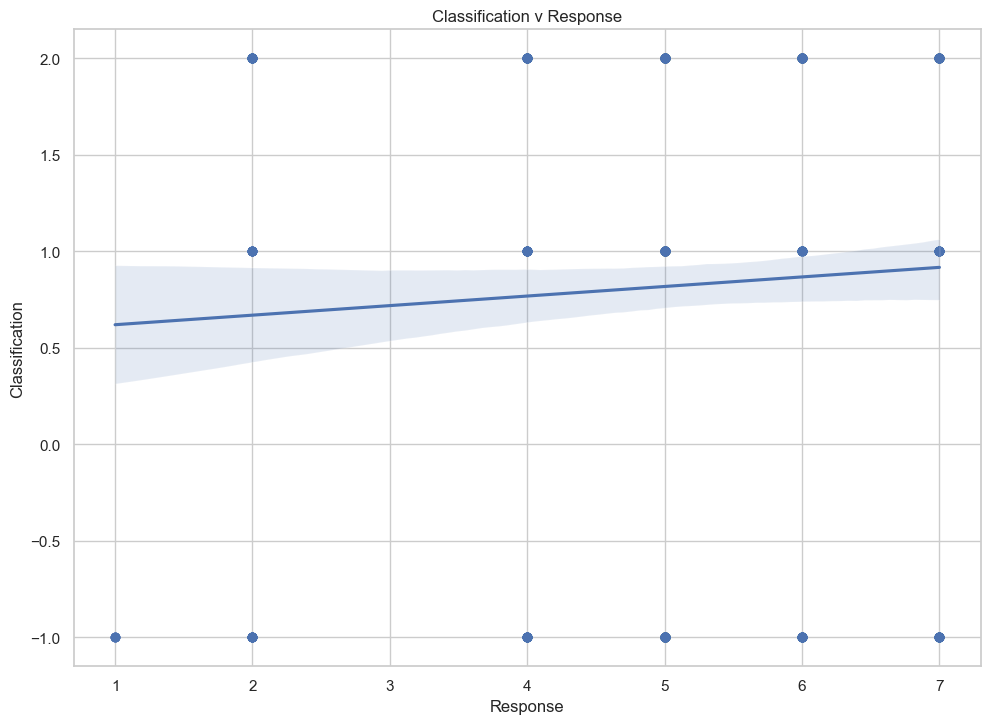

In [31]:
# scatter plot on classification v response
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_theme(style="whitegrid")

# increase size of plot
ax = sns.regplot(x=merged_df['response'], y=merged_df['classification'])
ax.set_title('Classification v Response')
ax.set_ylabel('Classification')
ax.set_xlabel('Response')


# kendall tau
print(
    stats.kendalltau(merged_df['response'], merged_df['classification'])
)

for question_type in merged_df.question_type_x.unique():
    print(question_type)
    print(stats.kendalltau(merged_df.loc[merged_df['question_type_x'] == question_type]['response'], merged_df.loc[merged_df['question_type_x'] == question_type]['classification']))

for method in merged_df.method.unique():
    print(method)
    print(stats.kendalltau(merged_df.loc[merged_df['method'] == method]['response'], merged_df.loc[merged_df['method'] == method]['classification']))

for question_type in merged_df.question_type_x.unique():
    for method in merged_df.method.unique():
        print(question_type, method)
        print(stats.kendalltau(merged_df.loc[(merged_df['question_type_x'] == question_type) & (merged_df['method'] == method)]['response'], merged_df.loc[(merged_df['question_type_x'] == question_type) & (merged_df['method'] == method)]['classification']))

# Human and Machine Data Analysis

Answer the question of how well the machine data correlates with the human data

Machine survey and human survey IAA
Machine annotation and human annotation IAA
Machine Survey and Machine Annotation Convergent Measures

## Machine Survey and Human Survey

In [42]:
label_to_question = {
    'new_fact_main_passage': 'The main passage is written as if the new fact is true', 
    'new_fact_related_passage': 'The related passage does not contradict the new fact',
    'main_passage_old_facts': 'Ignoring the new fact, most of the old facts are still true in the main passage.', 
    'related_passage_old_facts': 'Ignoring the new fact, most of the old facts are still true in the related passage.',
    'main_passage_consistency': 'Ignoring the old and new facts, the main passage does not contradict itself.', 
    'related_passage_consistency': 'Ignoring the old and new facts, the related passage does not contradict itself.',
    'cross_passage_consistency':'Ignoring the old and new facts, the main passage and the related passage do not contradict each other.', 
    'topicality': 'The main passage is focused on the subject and the related passage is focused on the related entity',
    'fluency': 'Both passages are natural sounding text close to what a human would write.'
}
question_to_label = {
    v: k for k, v in label_to_question.items()
}

# open and correlate scores with GPT 3.5 results
rome = '../results/broken_out_survey_llama2_chat_rome_edit_pilot_survey_gpt-3.5-turbo-0613.json'
no_edit = '../results/broken_out_survey_llama2_chat_no_edit_pilot_survey_gpt-3.5-turbo-0613.json'
human = '../results/broken_out_survey_llama2_chat_human_edit_pilot_survey_gpt-3.5-turbo-0613.json'

rome_8_shots = '../results/broken_out_survey_llama2_chat_rome_edit_pilot_survey_gpt-3.5-turbo-16k_shots_8.json'
no_edit_8_shots = '../results/broken_out_survey_llama2_chat_no_edit_pilot_survey_gpt-3.5-turbo-16k_shots_8.json'
human_8_shots = '../results/broken_out_survey_llama2_chat_human_edit_pilot_survey_gpt-3.5-turbo-16k_shots_8.json'


gpt35_survey_dfs =[]
for results, method in [(human, 'human'), (rome, 'rome'), (no_edit, 'no_edit')]:
    with open(results, 'r') as f:
        data = json.load(f)
        for sample_id, sample in data.items():
            if sample_id not in responses_df.sample_id.unique():
                continue
            for label, scores in sample.items():
                for score in scores:
                    gpt35_survey_dfs.append({
                        'method': method,
                        'question': label_to_question[label],
                        'response': score,
                        'question_type': question_types[label_to_question[label]],
                        'intervention': results.split('/')[-1].split('_')[3],
                        'model': 'gpt-3.5-turbo-0613',
                        'participant_id': 'gpt-3.5-turbo-0613',
                        'sample_id': sample_id
                    })
survey_df_gpt35 = pd.DataFrame(gpt35_survey_dfs)
# sort by sample_id, method, question
survey_df_gpt35.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)

gpt35_survey_dfs_8_shot =[]
for results, method in [(human_8_shots, 'human'), (rome_8_shots, 'rome'), (no_edit_8_shots, 'no_edit')]:
    with open(results, 'r') as f:
        data = json.load(f)
        for sample_id, sample in data.items():
            if sample_id not in responses_df.sample_id.unique():
                continue
            for label, scores in sample.items():
                for score in scores:
                    gpt35_survey_dfs_8_shot.append({
                        'method': method,
                        'question': label_to_question[label],
                        'response': score,
                        'question_type': question_types[label_to_question[label]],
                        'intervention': results.split('/')[-1].split('_')[3],
                        'model': 'gpt-3.5-turbo-0613',
                        'participant_id': 'gpt-3.5-turbo-0613',
                        'sample_id': sample_id
                    })
survey_df_gpt35_8_shot = pd.DataFrame(gpt35_survey_dfs_8_shot)
# sort by sample_id, method, question
survey_df_gpt35_8_shot.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)

# open and correlate scores with GPT 4 results
rome = '../results/broken_out_survey_llama2_chat_rome_edit_pilot_survey_gpt-4.json'
no_edit = '../results/broken_out_survey_llama2_chat_no_edit_pilot_survey_gpt-4.json'
human = '../results/broken_out_survey_llama2_chat_human_edit_pilot_survey_gpt-4.json'

rome_8_shot = '../results/broken_out_survey_llama2_chat_rome_edit_pilot_survey_gpt-4_shots_8.json'
no_edit_8_shot = '../results/broken_out_survey_llama2_chat_no_edit_pilot_survey_gpt-4_shots_8.json'
human_8_shot = '../results/broken_out_survey_llama2_chat_human_edit_pilot_survey_gpt-4_shots_8.json'

gpt4_survey_dfs =[]
for results, method in [(human, 'human'), (rome, 'rome'), (no_edit, 'no_edit')]:
    with open(results, 'r') as f:
        data = json.load(f)
        for sample_id, sample in data.items():
            if sample_id not in responses_df.sample_id.unique():
                continue
            for label, scores in sample.items():
                for score in scores:
                    gpt4_survey_dfs.append({
                        'method': method,
                        'question': label_to_question[label],
                        'question_type': question_types[label_to_question[label]],
                        'response': score,
                        'intervention': results.split('/')[-1].split('_')[3],
                        'model': 'gpt-4',
                        'participant_id': 'gpt-4',
                        'sample_id': sample_id
                    })
survey_df_gpt4 = pd.DataFrame(gpt4_survey_dfs)
# sort by sample_id, method, question
survey_df_gpt4.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)

gpt4_survey_dfs_8_shot =[]
for results, method in [(human_8_shot, 'human'), (rome_8_shot, 'rome'), (no_edit_8_shot, 'no_edit')]:
    with open(results, 'r') as f:
        data = json.load(f)
        for sample_id, sample in data.items():
            if sample_id not in responses_df.sample_id.unique():
                continue
            for label, scores in sample.items():
                for score in scores:
                    gpt4_survey_dfs_8_shot.append({
                        'method': method,
                        'question': label_to_question[label],
                        'question_type': question_types[label_to_question[label]],
                        'response': score,
                        'intervention': results.split('/')[-1].split('_')[3],
                        'model': 'gpt-4',
                        'participant_id': 'gpt-4',
                        'sample_id': sample_id
                    })

survey_df_gpt4_8_shot = pd.DataFrame(gpt4_survey_dfs_8_shot)
# sort by sample_id, method, question
survey_df_gpt4_8_shot.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)

### Characterization of data collected

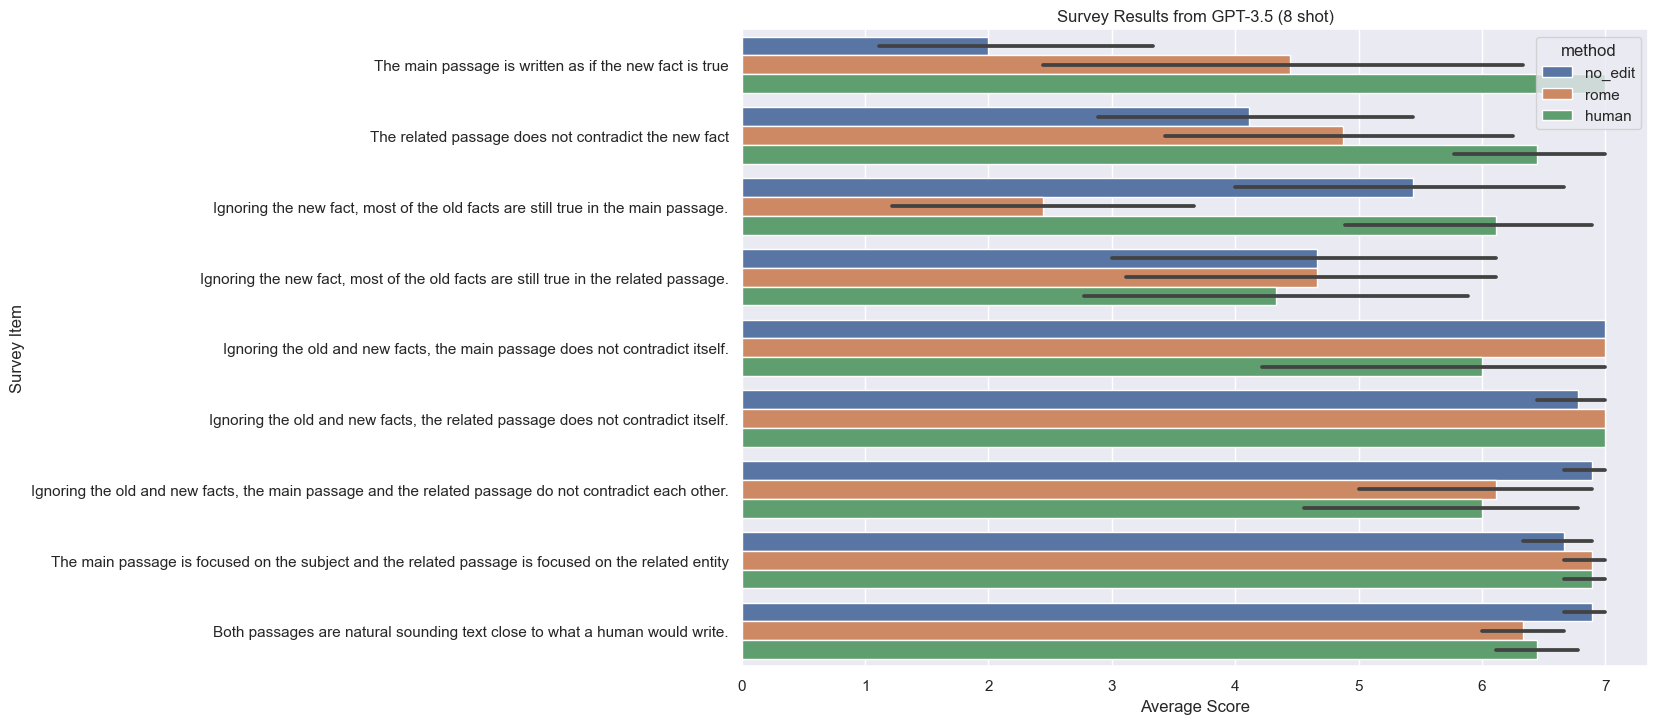

In [53]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="whitegrid")

# increase size of plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='response', y='question', hue='method', data=survey_df_gpt35, orient = 'h', order=question_order, hue_order=method_order)
ax.set_title('Survey Results from GPT-3.5 (8 shot)')
ax.set_ylabel('Survey Item')
ax.set_xlabel('Average Score')

# save plot
fig = ax.get_figure()
fig.savefig('../results/survey_gpt35_8_shot_results_pilot.png', dpi=300, bbox_inches='tight')

In [36]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="whitegrid")

# increase size of plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='response', y='question', hue='method', data=survey_df_gpt35_8_shot, orient = 'h')
ax.set_title('Survey Results from GPT-3.5')
ax.set_ylabel('Survey Item')
ax.set_xlabel('Average Score')

# save plot
fig = ax.get_figure()
fig.savefig('../results/survey_gpt35_results_pilot.png', dpi=300, bbox_inches='tight')

ValueError: Could not interpret input 'response'

In [ ]:
import numpy as np
from scipy.stats import iqr
# get median and iqr
pvt = survey_df_gpt35.pivot_table(index=['question_type'], columns=['method'], values='response', aggfunc=[np.mean, np.std])

pvt = pvt.round(1).astype(str)
pvt = pvt['mean'] + '±' + pvt['std']
pvt.to_csv('../results/survey_gpt35_results_table_question_type.csv')
pvt 

method,human,no_edit,rome
question_type,,,
Cross passage consistency,6.4±1.1,5.8±1.9,4.3±3.0
Edit consistency,5.8±1.9,3.0±2.5,4.8±2.7
Factual consistency,3.0±2.6,4.2±2.6,2.6±2.6
Internal consistency,6.6±1.5,6.9±0.2,6.4±1.2
Naturalness,5.4±2.2,6.7±0.5,5.4±2.2
Topicality,6.3±2.0,6.3±1.7,6.2±2.0


In [69]:
import numpy as np
from scipy.stats import iqr
# get median and iqr
pvt = survey_df_gpt35.pivot_table(index=['question_type'], columns=['method'], values='response', aggfunc=[np.mean, np.std])
pvt2 = responses_df.pivot_table(index=['question_type'], columns=['method'], values='response', aggfunc=[np.mean, np.std])
pvt = pvt.round(1)
pvt = pvt['mean'] - pvt2['mean']
pvt['total_diff'] = pvt.sum(axis=1)
pvt.round(1)

method,human,no_edit,rome,total_diff
question_type,,,,
Cross passage consistency,-0.2,1.7,2.9,4.4
Edit consistency,0.3,-0.2,-0.5,-0.4
Factual consistency,-0.8,0.5,0.1,-0.2
Internal consistency,0.4,1.4,2.0,3.8
Naturalness,-0.1,1.5,2.8,4.2
Topicality,0.7,1.7,1.6,3.9


In [70]:
print(pvt['total_diff'].sum().round(1))

15.7


In [71]:
import numpy as np
from scipy.stats import iqr
# get median and iqr
pvt = survey_df_gpt35_8_shot.pivot_table(index=['question_type'], columns=['method'], values='response', aggfunc=[np.mean, np.std])
pvt2 = responses_df.pivot_table(index=['question_type'], columns=['method'], values='response', aggfunc=[np.mean, np.std])
pvt = pvt.round(1)
pvt = pvt['mean'] - pvt2['mean']
pvt['total_diff'] = pvt.sum(axis=1)
pvt.round(1)

method,human,no_edit,rome,total_diff
question_type,,,,
Cross passage consistency,0.2,0.6,1.1,1.9
Edit consistency,-0.6,-0.3,-0.3,-1.2
Factual consistency,-3.0,-0.4,-0.9,-4.3
Internal consistency,0.4,1.4,1.4,3.2
Naturalness,-1.1,1.3,1.9,2.1
Topicality,0.1,1.3,0.9,2.2


In [72]:
print(pvt['total_diff'].sum().round(1))

3.9


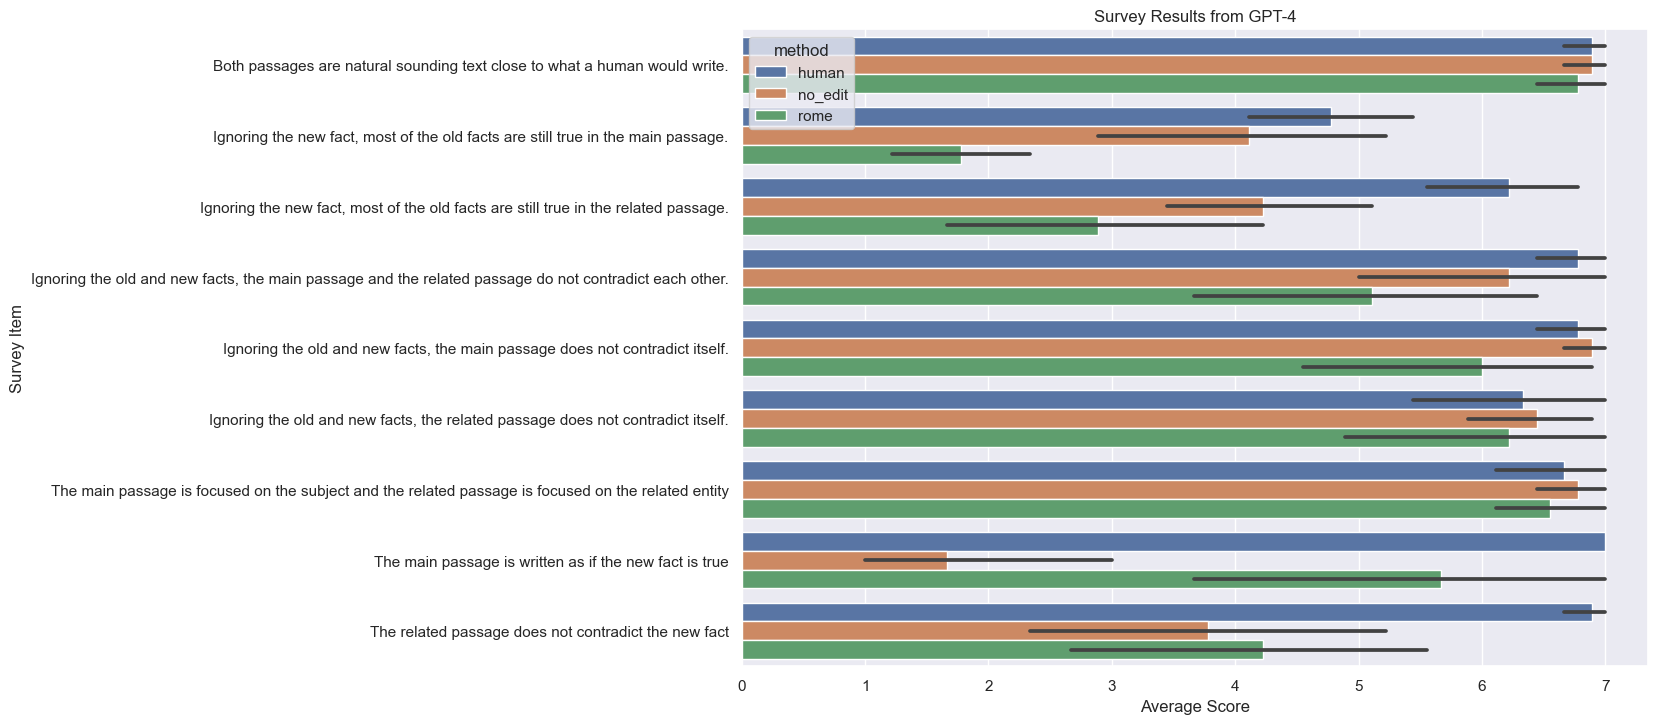

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="whitegrid")

# increase size of plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='response', y='question', hue='method', data=survey_df_gpt4, orient = 'h')
ax.set_title('Survey Results from GPT-4')
ax.set_ylabel('Survey Item')
ax.set_xlabel('Average Score')

# save plot
fig = ax.get_figure()
fig.savefig('../results/survey_gpt4_results_pilot.png', dpi=300, bbox_inches='tight')

In [64]:
import numpy as np
from scipy.stats import iqr
# get median and iqr
pvt = survey_df_gpt4.pivot_table(index=['question_type'], columns=['method'], values='response', aggfunc=[np.mean, np.std])
pvt2 = responses_df.pivot_table(index=['question_type'], columns=['method'], values='response', aggfunc=[np.mean, np.std])
pvt = pvt.round(1)
pvt = pvt['mean'] - pvt2['mean']
pvt['total_diff'] = pvt.sum(axis=1)
pvt.round(1)

method,human,no_edit,rome,total_diff
question_type,,,,
Cross passage consistency,0.8,1.1,2.6,4.5
Edit consistency,0.0,0.1,0.6,0.7
Factual consistency,-0.5,1.0,-0.8,-0.3
Internal consistency,0.1,1.2,1.2,2.5
Naturalness,0.3,0.7,2.4,3.4
Topicality,-0.8,1.2,0.9,1.2


In [65]:
print(pvt['total_diff'].sum().round(1))

12.0


In [73]:
import numpy as np
from scipy.stats import iqr
# get median and iqr
pvt = survey_df_gpt4_8_shot.pivot_table(index=['question_type'], columns=['method'], values='response', aggfunc=[np.mean, np.std])
pvt2 = responses_df.pivot_table(index=['question_type'], columns=['method'], values='response', aggfunc=[np.mean, np.std])
pvt = pvt.round(1)
pvt = pvt['mean'] - pvt2['mean']
pvt['total_diff'] = pvt.sum(axis=1)
pvt.round(1)

method,human,no_edit,rome,total_diff
question_type,,,,
Cross passage consistency,0.6,1.0,1.9,3.5
Edit consistency,0.5,-0.6,-0.2,-0.3
Factual consistency,-0.5,-0.4,-1.2,-2.1
Internal consistency,0.4,1.2,1.1,2.7
Naturalness,0.4,1.5,3.3,5.2
Topicality,0.5,1.8,1.3,3.5


In [74]:
print(pvt['total_diff'].sum().round(1))

12.5


In [ ]:
import numpy as np
from scipy.stats import iqr
# get median and iqr
pvt = survey_df_gpt4.pivot_table(index=['question_type'], columns=['method'], values='response', aggfunc=[np.mean, np.std])

pvt = pvt.round(1).astype(str)
pvt = pvt['mean'] + '±' + pvt['std']
pvt.to_csv('../results/survey_gpt4_results_table_question_type.csv')
pvt 

method,human,no_edit,rome
question_type,,,
Cross passage consistency,6.8±0.4,6.2±1.6,5.1±2.2
Edit consistency,6.9±0.2,2.7±2.4,4.9±2.5
Factual consistency,5.5±1.3,4.2±1.7,2.3±1.7
Internal consistency,6.6±1.0,6.7±0.7,6.1±1.9
Naturalness,6.9±0.3,6.9±0.3,6.8±0.4
Topicality,6.7±0.7,6.8±0.4,6.6±0.7


### Inter rater reliability

Text(0.5, 0, 'GPT 3.5')

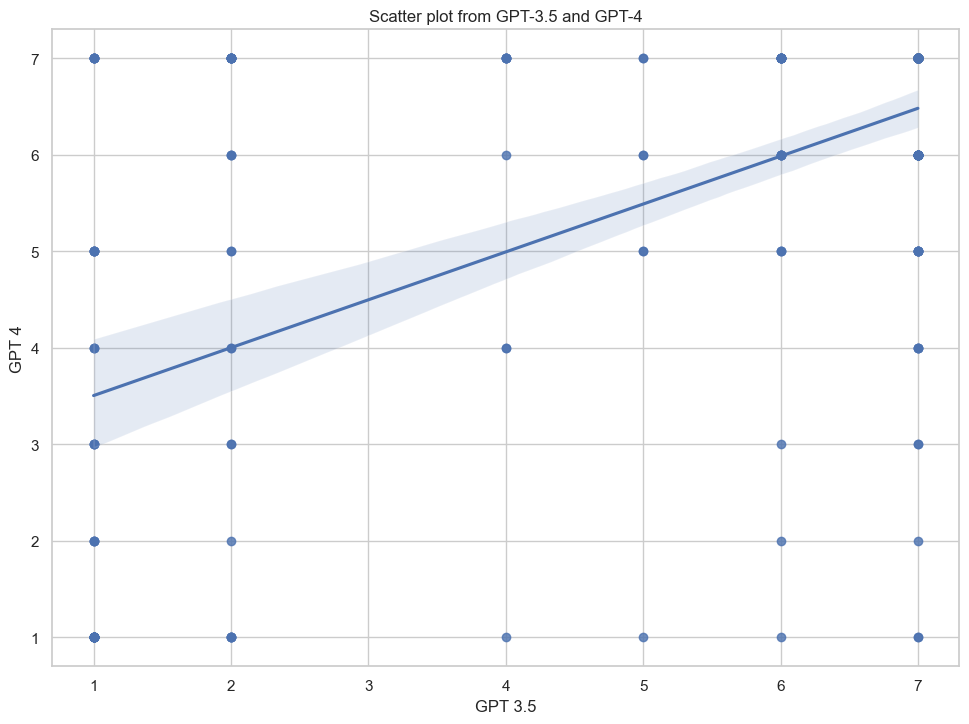

In [ ]:
# scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# participants in order 1
order_1_responses = survey_df_gpt35['response'].fillna(4)
order_2_responses = survey_df_gpt4['response'].fillna(4)
# increase size of plot
ax = sns.regplot(x=list(order_1_responses), y=list(order_2_responses))
ax.set_title('Scatter plot from GPT-3.5 and GPT-4')
ax.set_ylabel('GPT 4')
ax.set_xlabel('GPT 3.5')

In [ ]:
# kendall tau
import scipy.stats as stats
order_1_responses_tmp = survey_df_gpt35.loc[
        (survey_df_gpt35['method'] == method)
    ]['response'].fillna(4)
order_2_responses_tmp = survey_df_gpt4.loc[
    (survey_df_gpt4['method'] == method)
]['response'].fillna(4)
stats.kendalltau(order_1_responses_tmp, order_2_responses_tmp)

KendalltauResult(correlation=0.5983973784119763, pvalue=1.7351621349331564e-10)

In [ ]:
for method in responses_df.method.unique():
    order_1_responses_tmp = survey_df_gpt35.loc[
        (survey_df_gpt35['method'] == method)
    ]['response'].fillna(4)
    order_2_responses_tmp = survey_df_gpt4.loc[
        (survey_df_gpt4['method'] == method)
    ]['response'].fillna(4)
    print(method)
    print(stats.kendalltau(order_1_responses_tmp, order_2_responses_tmp))


human
KendalltauResult(correlation=0.2923942582728413, pvalue=0.0034760791373992807)
no_edit
KendalltauResult(correlation=0.5983973784119763, pvalue=1.7351621349331564e-10)
rome
KendalltauResult(correlation=0.46660684102843286, pvalue=8.180095962285886e-07)


In [ ]:
for question_type in responses_df.question_type.unique():
    order_1_responses_tmp = survey_df_gpt35.loc[
        (survey_df_gpt35['question_type'] == question_type)
    ]['response'].fillna(4)
    order_2_responses_tmp = survey_df_gpt4.loc[
        (survey_df_gpt4['question_type'] == question_type)
    ]['response'].fillna(4)
    print(question_type)
    print(stats.kendalltau(order_1_responses_tmp, order_2_responses_tmp))


Naturalness
KendalltauResult(correlation=-0.014253751903120995, pvalue=0.9385169310621544)
Factual consistency
KendalltauResult(correlation=0.47993794887452873, pvalue=1.3691759416530254e-05)
Cross passage consistency
KendalltauResult(correlation=0.7792277334484365, pvalue=5.188429117017125e-06)
Internal consistency
KendalltauResult(correlation=0.003969480868966956, pvalue=0.9753856637967099)
Topicality
KendalltauResult(correlation=-0.2630761098009901, pvalue=0.15670263085068528)
Edit consistency
KendalltauResult(correlation=0.477457803559723, pvalue=6.358777922094708e-05)


In [ ]:
for method in responses_df.method.unique():
    for question in responses_df.question.unique():
        order_1_responses_tmp = survey_df_gpt35.loc[
            (survey_df_gpt35['question'] == question) & (survey_df_gpt35['method'] == method)
        ]['response'].fillna(4)
        order_2_responses_tmp = survey_df_gpt4.loc[
            (survey_df_gpt4['question'] == question) & (survey_df_gpt4['method'] == method)
        ]['response'].fillna(4)
        print(method, question)
        print(stats.kendalltau(order_1_responses_tmp, order_2_responses_tmp))


human Both passages are natural sounding text close to what a human would write.
KendalltauResult(correlation=0.1414213562373095, pvalue=0.6698153575994166)
human Ignoring the new fact, most of the old facts are still true in the main passage.
KendalltauResult(correlation=0.7302967433402215, pvalue=0.024948872962331163)
human Ignoring the new fact, most of the old facts are still true in the related passage.
KendalltauResult(correlation=-0.037139067635410375, pvalue=0.9028535249882852)
human Ignoring the old and new facts, the main passage and the related passage do not contradict each other.
KendalltauResult(correlation=0.9660917830792959, pvalue=0.005012287145488681)
human Ignoring the old and new facts, the main passage does not contradict itself.
KendalltauResult(correlation=-0.27602622373694163, pvalue=0.4226780741706355)
human Ignoring the old and new facts, the related passage does not contradict itself.
KendalltauResult(correlation=-0.18257418583505536, pvalue=0.595883090565177

In [ ]:
# calculate ICC
import pingouin as pg

merged_df = pd.concat([survey_df_gpt35, survey_df_gpt4] )
merged_df['sample_id'] = merged_df['sample_id'] + merged_df['method'] + merged_df['question']
pg.intraclass_corr(
    data=merged_df,
    targets='sample_id',
    raters='model',
    ratings='response'
)

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.574192,3.696956,242,243,3.657518e-23,"[0.48, 0.65]"
1,ICC2,Single random raters,0.576875,3.810427,242,242,4.979992e-24,"[0.48, 0.66]"
2,ICC3,Single fixed raters,0.584236,3.810427,242,242,4.979992e-24,"[0.49, 0.66]"
3,ICC1k,Average raters absolute,0.729507,3.696956,242,243,3.657518e-23,"[0.65, 0.79]"
4,ICC2k,Average random raters,0.731669,3.810427,242,242,4.979992e-24,"[0.65, 0.79]"
5,ICC3k,Average fixed raters,0.737562,3.810427,242,242,4.979992e-24,"[0.66, 0.8]"


In [ ]:
# calculate ICC
import pingouin as pg

for method in merged_df.method.unique():
    for question in merged_df.question.unique():
        print(method, question)
        print(pg.intraclass_corr(
            data=merged_df.loc[
                (merged_df['question'] == question) & (merged_df['method'] == method)
            ],
            targets='sample_id',
            raters='model', 
            ratings='response'
        ))

human Both passages are natural sounding text close to what a human would write.
    Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute -0.159705  0.724576    8    9  0.669751   
1   ICC2     Single random raters -0.021645  0.944751    8    8  0.531047   
2   ICC3      Single fixed raters -0.028409  0.944751    8    8  0.531047   
3  ICC1k  Average raters absolute -0.380117  0.724576    8    9  0.669751   
4  ICC2k    Average random raters -0.044248  0.944751    8    8  0.531047   
5  ICC3k     Average fixed raters -0.058480  0.944751    8    8  0.531047   

           CI95%  
0   [-0.7, 0.52]  
1  [-0.44, 0.55]  
2  [-0.65, 0.61]  
3  [-4.66, 0.68]  
4  [-1.55, 0.71]  
5  [-3.69, 0.76]  
human Ignoring the new fact, most of the old facts are still true in the main passage.
    Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.118194  1.268072    8    9  0.363295   
1   I

    Type              Description       ICC        F  df1  df2      pval  \
0   ICC1   Single raters absolute -0.133144  0.76500    8    9  0.641825   
1   ICC2     Single random raters  0.123888  1.58652    8    8  0.264346   
2   ICC3      Single fixed raters  0.226760  1.58652    8    8  0.264346   
3  ICC1k  Average raters absolute -0.307190  0.76500    8    9  0.641825   
4  ICC2k    Average random raters  0.220463  1.58652    8    8  0.264346   
5  ICC3k     Average fixed raters  0.369690  1.58652    8    8  0.264346   

           CI95%  
0  [-0.69, 0.54]  
1  [-0.18, 0.59]  
2  [-0.47, 0.75]  
3   [-4.36, 0.7]  
4  [-0.44, 0.74]  
5  [-1.79, 0.86]  
human Ignoring the old and new facts, the main passage and the related passage do not contradict each other.
    Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.629630  4.400000    8    9  0.020148   
1   ICC2     Single random raters  0.636364  4.888889    8    8  0.0188

In [ ]:
# agreement scores

# calculate agreement within 1, 2, and 3 points
absolute_agreement = np.sum(order_1_responses == np.array(order_2_responses)) / len(order_1_responses)
agreement_within_one = np.sum(np.abs(order_1_responses - np.array(order_2_responses) <= 1)) / len(order_1_responses)
agreement_within_two = np.sum(np.abs(order_1_responses - np.array(order_2_responses) <= 2)) / len(order_1_responses)
agreement_within_three = np.sum(np.abs(order_1_responses - np.array(order_2_responses) <= 3)) / len(order_1_responses)

print(
    'Absolute Agreement: ', absolute_agreement
)
print(
    'Agreement within 1 point: ', agreement_within_one
)
print(
    'Agreement within 2 points: ', agreement_within_two
)
print(
    'Agreement within 3 points: ', agreement_within_three
)

Absolute Agreement:  0.522633744855967
Agreement within 1 point:  0.9135802469135802
Agreement within 2 points:  0.9423868312757202
Agreement within 3 points:  0.9670781893004116


### Statistical significance

In [147]:
import warnings
warnings.filterwarnings("ignore")

for method_1 in survey_df_gpt35.method.unique():
    for method_2 in survey_df_gpt35.method.unique():
        if method_1 == method_2:
            continue
        for question_type in survey_df_gpt35.question_type.unique():
            method_1_responses_tmp = survey_df_gpt35.loc[
                (survey_df_gpt35['question_type'] == question_type) & (survey_df_gpt35['method'] == method_1)
            ]['response']
            method_2_responses_tmp = survey_df_gpt35.loc[
                (survey_df_gpt35['question_type'] == question_type) & (survey_df_gpt35['method'] == method_2)
            ]['response']

            
            effect_df = pg.wilcoxon(
                method_1_responses_tmp,
                method_2_responses_tmp,
                alternative='less'
            )
            if effect_df['p-val'].values[0] < 0.05:
                print(f"{method_1} is significantly less than {method_2} for {question_type}")
                print(effect_df)

no_edit is significantly less than human for Edit consistency
          W-val alternative     p-val       RBC      CLES
Wilcoxon    5.0        less  0.000351 -0.934641  0.916667
no_edit is significantly less than rome for Edit consistency
          W-val alternative     p-val       RBC      CLES
Wilcoxon   10.5        less  0.023029 -0.681818  0.681661
rome is significantly less than human for Factual consistency
          W-val alternative     p-val       RBC      CLES
Wilcoxon   29.0        less  0.040741 -0.516667  0.699074
rome is significantly less than human for Edit consistency
          W-val alternative     p-val       RBC      CLES
Wilcoxon    5.5        less  0.007921 -0.833333  0.712803
rome is significantly less than no_edit for Naturalness
          W-val alternative     p-val  RBC      CLES
Wilcoxon    0.0        less  0.018444 -1.0  0.777778


In [149]:
import warnings
warnings.filterwarnings("ignore")

for method_1 in survey_df_gpt35_8_shot.method.unique():
    for method_2 in survey_df_gpt35_8_shot.method.unique():
        if method_1 == method_2:
            continue
        for question_type in survey_df_gpt35_8_shot.question_type.unique():
            method_1_responses_tmp = survey_df_gpt35_8_shot.loc[
                (survey_df_gpt35_8_shot['question_type'] == question_type) & (survey_df_gpt35_8_shot['method'] == method_1)
            ]['response']
            method_2_responses_tmp = survey_df_gpt35_8_shot.loc[
                (survey_df_gpt35_8_shot['question_type'] == question_type) & (survey_df_gpt35_8_shot['method'] == method_2)
            ]['response']

            
            effect_df = pg.wilcoxon(
                method_1_responses_tmp,
                method_2_responses_tmp,
                alternative='less'
            )
            if effect_df['p-val'].values[0] < 0.05:
                print(f"{method_1} is significantly less than {method_2} for {question_type}")
                print(effect_df)

no_edit is significantly less than human for Edit consistency
          W-val alternative     p-val       RBC     CLES
Wilcoxon    6.0        less  0.001815 -0.885714  0.79321
no_edit is significantly less than rome for Edit consistency
          W-val alternative     p-val       RBC      CLES
Wilcoxon   21.0        less  0.044592 -0.538462  0.683642
rome is significantly less than no_edit for Internal consistency
          W-val alternative     p-val  RBC      CLES
Wilcoxon    0.0        less  0.048756 -1.0  0.614198


In [148]:
import warnings
warnings.filterwarnings("ignore")

for method_1 in survey_df_gpt4.method.unique():
    for method_2 in survey_df_gpt4.method.unique():
        if method_1 == method_2:
            continue
        for question_type in survey_df_gpt4.question_type.unique():
            method_1_responses_tmp = survey_df_gpt4.loc[
                (survey_df_gpt4['question_type'] == question_type) & (survey_df_gpt4['method'] == method_1)
            ]['response']
            method_2_responses_tmp = survey_df_gpt4.loc[
                (survey_df_gpt4['question_type'] == question_type) & (survey_df_gpt4['method'] == method_2)
            ]['response']

            
            effect_df = pg.wilcoxon(
                method_1_responses_tmp,
                method_2_responses_tmp,
                alternative='less'
            )
            if effect_df['p-val'].values[0] < 0.05:
                print(f"{method_1} is significantly less than {method_2} for {question_type}")
                print(effect_df)

no_edit is significantly less than human for Cross passage consistency
          W-val alternative     p-val  RBC      CLES
Wilcoxon    0.0        less  0.044487 -1.0  0.722222
no_edit is significantly less than human for Edit consistency
          W-val alternative     p-val       RBC      CLES
Wilcoxon    7.5        less  0.003985 -0.835165  0.792388
no_edit is significantly less than rome for Edit consistency
          W-val alternative     p-val       RBC      CLES
Wilcoxon   13.5        less  0.012316 -0.703297  0.766436
rome is significantly less than human for Factual consistency
          W-val alternative     p-val       RBC     CLES
Wilcoxon   16.5        less  0.003861 -0.757353  0.78858
rome is significantly less than human for Cross passage consistency
          W-val alternative     p-val  RBC      CLES
Wilcoxon    0.0        less  0.048756 -1.0  0.722222
rome is significantly less than no_edit for Factual consistency
          W-val alternative     p-val    RBC      CLES

In [150]:
import warnings
warnings.filterwarnings("ignore")

for method_1 in survey_df_gpt4_8_shot.method.unique():
    for method_2 in survey_df_gpt4_8_shot.method.unique():
        if method_1 == method_2:
            continue
        for question_type in survey_df_gpt4_8_shot.question_type.unique():
            method_1_responses_tmp = survey_df_gpt4_8_shot.loc[
                (survey_df_gpt4_8_shot['question_type'] == question_type) & (survey_df_gpt4_8_shot['method'] == method_1)
            ]['response']
            method_2_responses_tmp = survey_df_gpt4_8_shot.loc[
                (survey_df_gpt4_8_shot['question_type'] == question_type) & (survey_df_gpt4_8_shot['method'] == method_2)
            ]['response']

            
            effect_df = pg.wilcoxon(
                method_1_responses_tmp,
                method_2_responses_tmp,
                alternative='less'
            )
            if effect_df['p-val'].values[0] < 0.05:
                print(f"{method_1} is significantly less than {method_2} for {question_type}")
                print(effect_df)

no_edit is significantly less than human for Factual consistency
          W-val alternative     p-val       RBC      CLES
Wilcoxon   21.5        less  0.014866 -0.641667  0.726852
no_edit is significantly less than human for Edit consistency
          W-val alternative     p-val  RBC      CLES
Wilcoxon    0.0        less  0.000232 -1.0  0.912037
no_edit is significantly less than rome for Edit consistency
          W-val alternative     p-val       RBC      CLES
Wilcoxon   13.0        less  0.011221 -0.714286  0.726852
rome is significantly less than human for Factual consistency
          W-val alternative     p-val       RBC      CLES
Wilcoxon    1.5        less  0.000008 -0.982456  0.901235
rome is significantly less than human for Cross passage consistency
          W-val alternative    p-val       RBC      CLES
Wilcoxon    1.5        less  0.03657 -0.857143  0.771605
rome is significantly less than human for Edit consistency
          W-val alternative     p-val  RBC      CLES
Wi

### Inter rater reliability between human and machine

SpearmanrResult(correlation=0.1787380417895008, pvalue=7.427570307808452e-05)

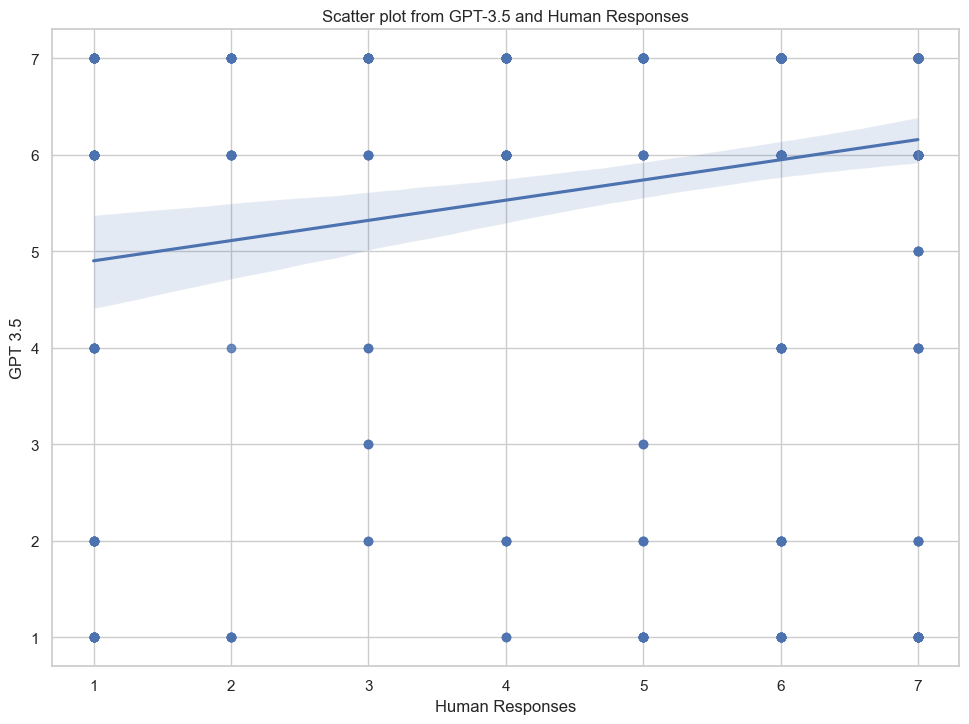

In [97]:
# scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# participants in order 1
responses_df.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)
order_1_responses = list(
    responses_df[responses_df['participant_id'].str.contains('Order_1')]['response']
) + list(
    responses_df[responses_df['participant_id'].str.contains('Order_2')]['response']
)
survey_df_gpt35.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)
gpt35_responses = list(survey_df_gpt35['response'].fillna(4)) + list(survey_df_gpt35['response'].fillna(4))
# increase size of plot
ax = sns.regplot(x=list(order_1_responses), y=list(gpt35_responses))
ax.set_title('Scatter plot from GPT-3.5 and Human Responses')
ax.set_ylabel('GPT 3.5')
ax.set_xlabel('Human Responses')

# kendall tau
import scipy.stats as stats
stats.spearmanr(order_1_responses, gpt35_responses)

SpearmanrResult(correlation=0.19755249814603265, pvalue=1.14808236182656e-05)

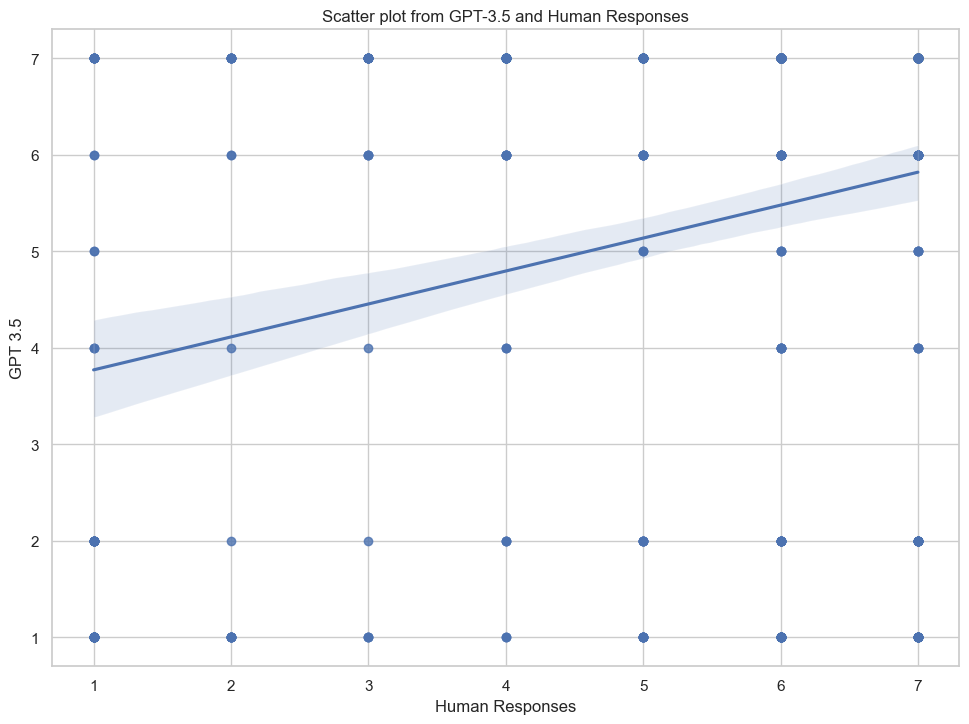

In [96]:
# scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# participants in order 1
responses_df.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)
order_1_responses = list(
    responses_df[responses_df['participant_id'].str.contains('Order_1')]['response']
) + list(
    responses_df[responses_df['participant_id'].str.contains('Order_2')]['response']
)
survey_df_gpt35_8_shot.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)
gpt35_responses = list(survey_df_gpt35_8_shot['response'].fillna(4)) + list(survey_df_gpt35_8_shot['response'].fillna(4))
# increase size of plot
ax = sns.regplot(x=list(order_1_responses), y=list(gpt35_responses))
ax.set_title('Scatter plot from GPT-3.5 and Human Responses')
ax.set_ylabel('GPT 3.5')
ax.set_xlabel('Human Responses')

# kendall tau
import scipy.stats as stats
stats.spearmanr(order_1_responses, gpt35_responses)

SpearmanrResult(correlation=0.18288222744991067, pvalue=5.000903111881477e-05)

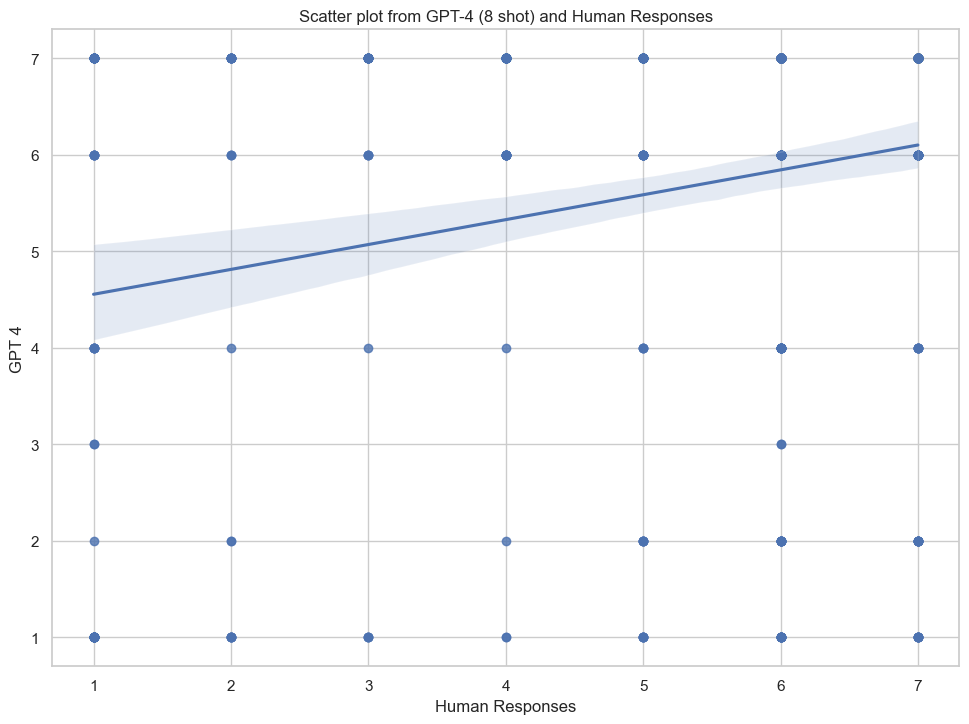

In [93]:
# scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# participants in order 1
responses_df.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)
order_1_responses = list(
    responses_df[responses_df['participant_id'].str.contains('Order_1')]['response']
)  + list(
    responses_df[responses_df['participant_id'].str.contains('Order_2')]['response']
) 
survey_df_gpt4.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)
gpt4_responses = list(survey_df_gpt4['response'].fillna(4)) + list(survey_df_gpt4['response'].fillna(4))
# increase size of plot
ax = sns.regplot(x=list(order_1_responses), y=list(gpt4_responses))
ax.set_title('Scatter plot from GPT-4 (8 shot) and Human Responses')
ax.set_ylabel('GPT 4')
ax.set_xlabel('Human Responses')

# kendall tau
import scipy.stats as stats
stats.spearmanr(order_1_responses, gpt4_responses)

SpearmanrResult(correlation=0.2860993437410544, pvalue=1.3123449044072417e-10)

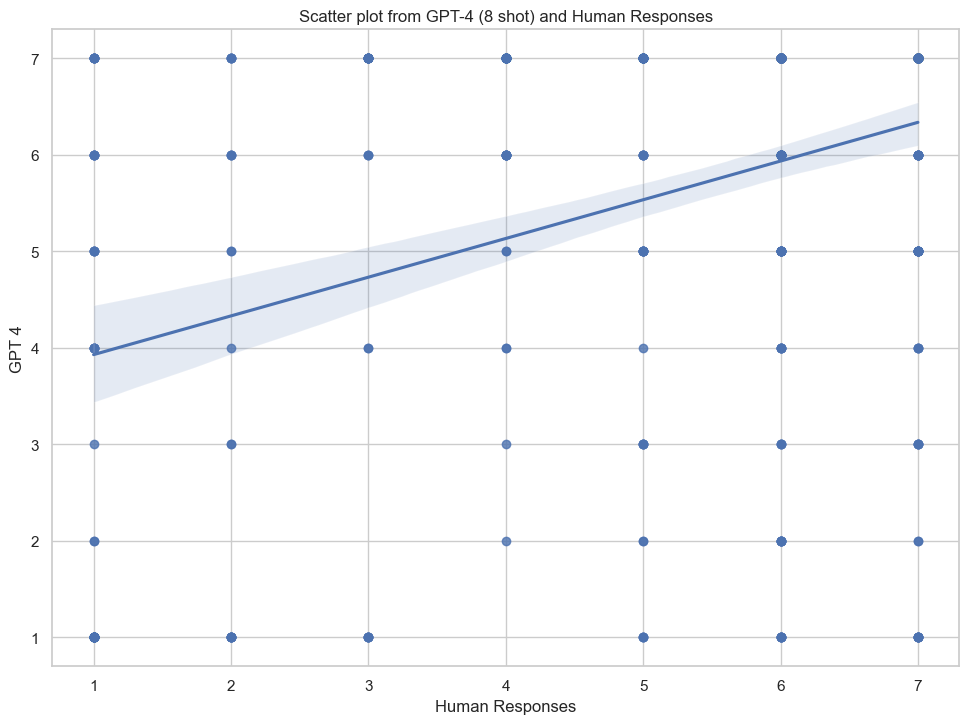

In [94]:
# scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# participants in order 1
responses_df.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)
order_1_responses = list(
    responses_df[responses_df['participant_id'].str.contains('Order_1')]['response']
)  + list(
    responses_df[responses_df['participant_id'].str.contains('Order_2')]['response']
) 
survey_df_gpt4_8_shot.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)
gpt4_responses = list(survey_df_gpt4_8_shot['response'].fillna(4)) + list(survey_df_gpt4_8_shot['response'].fillna(4))
# increase size of plot
ax = sns.regplot(x=list(order_1_responses), y=list(gpt4_responses))
ax.set_title('Scatter plot from GPT-4 (8 shot) and Human Responses')
ax.set_ylabel('GPT 4')
ax.set_xlabel('Human Responses')

# kendall tau
import scipy.stats as stats
stats.spearmanr(order_1_responses, gpt4_responses)

#### Spearman Correlations between human and machine by method

In [117]:
survey = {
    'gpt4_8_shot': survey_df_gpt4_8_shot,
    'gpt35_8_shot': survey_df_gpt35_8_shot,
    'gpt4': survey_df_gpt4,
    'gpt35': survey_df_gpt35
}
results = []
for method, df in survey.items():
    merged_df = pd.merge(
        df,
        responses_df,
        on=['sample_id', 'method', 'question']
    ).fillna(4)
    corr_table = merged_df[['response_x','response_y']].corr(
        method='spearman'
    )
    results.append({
        'method': method,
        'correlation': corr_table['response_x']['response_y']
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by=['method']).set_index('method')

,correlation
method,
gpt35,0.178738
gpt35_8_shot,0.197552
gpt4,0.182882
gpt4_8_shot,0.286099


In [146]:
survey = {
    'gpt4_8_shot': survey_df_gpt4_8_shot,
    'gpt35_8_shot': survey_df_gpt35_8_shot,
    'gpt4': survey_df_gpt4,
    'gpt35': survey_df_gpt35
}
results = []
for method, df in survey.items():
    merged_df = pd.merge(
        df,
        responses_df,
        on=['sample_id', 'method', 'question']
    ).fillna(4)
    merged_df = merged_df.loc[
        merged_df['question_type_x'].isin(['Edit consistency','Factual consistency'])
    ]
    corr_table = merged_df[['response_x','response_y']].corr(
        method='spearman'
    )
    results.append({
        'method': method,
        'correlation': corr_table['response_x']['response_y']
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by=['method']).set_index('method')

,correlation
method,
gpt35,0.244695
gpt35_8_shot,0.282535
gpt4,0.292967
gpt4_8_shot,0.438069


In [123]:
survey = {
    'gpt4_8_shot': survey_df_gpt4_8_shot,
    'gpt35_8_shot': survey_df_gpt35_8_shot,
    'gpt4': survey_df_gpt4,
    'gpt35': survey_df_gpt35
}
results = []
for method, df in survey.items():
    merged_df = pd.merge(
        df,
        responses_df,
        on=['sample_id', 'method', 'question']
    ).fillna(4)
    for question_type_x in merged_df.question_type_x.unique():
        merged_tmp = merged_df.loc[merged_df['question_type_x'] == question_type_x]
        corr_table = merged_tmp[['response_x','response_y']].corr(
            method='spearman'
        )
        results.append({
            'method': method,
            'question_type_x': question_type_x,
            'correlation': corr_table['response_x']['response_y']
        })

results_df = pd.DataFrame(results)
results_df.sort_values(by=['correlation']).set_index('method')

,question_type_x,correlation
method,,
gpt4,Topicality,-0.287136
gpt35_8_shot,Topicality,-0.168679
gpt35,Cross passage consistency,-0.089962
gpt35,Topicality,-0.081476
gpt4_8_shot,Naturalness,-0.067838
gpt4_8_shot,Topicality,-0.042511
gpt35,Internal consistency,-0.020268
gpt4,Internal consistency,0.004574
gpt35_8_shot,Internal consistency,0.036121


In [100]:
merged_df = pd.merge(
    responses_df,
    survey_df_gpt4_8_shot,
    on=['sample_id', 'method', 'question'],
).fillna(4)


In [101]:
agreements = []
for method in merged_df.method.unique():
    for question_type in merged_df.question_type_x.unique():
        for participant in merged_df.participant_id_x.unique():
            res_x = merged_df.loc[
                (merged_df['method'] == method) & (merged_df['question_type_x'] == question_type)
                & (merged_df['participant_id_x'] == participant)
            ]['response_x'],
            res_y = merged_df.loc[
                (merged_df['method'] == method) & (merged_df['question_type_x'] == question_type)
                & (merged_df['participant_id_x'] == participant)
            ]['response_y']
            # disagreements
            agreements.append({
                'method': method,
                'question_type': question_type,
                'participant': participant,
                'disagreements_abs': np.sum(np.abs(np.array(res_x) - np.array(res_y)) > 1),
                'disagreements_1': np.sum(np.abs(np.array(res_x) - np.array(res_y)) > 2),
                'disagreements_2': np.sum(np.abs(np.array(res_x) - np.array(res_y)) > 3),
                'disagreements_degree': np.sum(np.abs(np.array(res_x) - np.array(res_y)))
            })
agreements_df = pd.DataFrame(agreements)
agreements_df.groupby(['participant']).sum().sort_values(by=['disagreements_degree'])

,disagreements_abs,disagreements_1,disagreements_2,disagreements_degree
participant,,,,
Group_4_Order_1_0,18,11,7,69
Group_2_Order_2_0,22,18,11,119
Group_4_Order_2_0,28,14,7,119
Group_3_Order_1_0,43,27,13,152
Group_3_Order_2_0,43,27,13,152
Group_2_Order_1_0,41,28,22,173


In [102]:
for method in merged_df.method.unique():
    print(
        method,
        stats.kendalltau(
            merged_df.loc[merged_df['method'] == method]['response_x'],
            merged_df.loc[merged_df['method'] == method]['response_y']
        )
    )


human KendalltauResult(correlation=0.08991461769424836, pvalue=0.21365534394188734)
no_edit KendalltauResult(correlation=0.12339707171021776, pvalue=0.05133829098381912)
rome KendalltauResult(correlation=0.26281986267215657, pvalue=3.5338697904049086e-05)


In [103]:
for question_type in merged_df.question_type_x.unique():
    print(
        question_type,
        stats.spearmanr(
            merged_df.loc[merged_df['question_type_x'] == question_type]['response_x'],
            merged_df.loc[merged_df['question_type_x'] == question_type]['response_y']
        )
    )


Naturalness SpearmanrResult(correlation=-0.06783841041513852, pvalue=0.6259705864801248)
Factual consistency SpearmanrResult(correlation=0.26425762094832894, pvalue=0.0057168170729628865)
Cross passage consistency SpearmanrResult(correlation=0.18733656784471864, pvalue=0.17494987401128084)
Internal consistency SpearmanrResult(correlation=0.11917919227857371, pvalue=0.2192524077487686)
Topicality SpearmanrResult(correlation=-0.04251073511372074, pvalue=0.7602006620622996)
Edit consistency SpearmanrResult(correlation=0.4962893293535874, pvalue=4.70332872234398e-08)


In [104]:
for method in merged_df.method.unique():
    for question_type in merged_df.question_type_x.unique():
        print(
            method, question_type,
            stats.spearmanr(
                merged_df.loc[(merged_df['method'] == method) & (merged_df['question_type_x'] == question_type)]['response_x'],
                merged_df.loc[(merged_df['method'] == method) & (merged_df['question_type_x'] == question_type)]['response_y']
            )
        )

human Naturalness SpearmanrResult(correlation=0.3535533905932738, pvalue=0.1500687317073684)
human Factual consistency SpearmanrResult(correlation=-0.14692903623564277, pvalue=0.39248657448027413)
human Cross passage consistency SpearmanrResult(correlation=0.39686269665968865, pvalue=0.10296451125288161)
human Internal consistency SpearmanrResult(correlation=-0.18304270996773492, pvalue=0.28526925896781224)
human Topicality SpearmanrResult(correlation=-0.28067069969390585, pvalue=0.2592518460812448)
human Edit consistency SpearmanrResult(correlation=0.10622068919116734, pvalue=0.5375116606659147)
no_edit Naturalness SpearmanrResult(correlation=-0.3018649989291162, pvalue=0.2234470728035461)
no_edit Factual consistency SpearmanrResult(correlation=-0.2595431108137498, pvalue=0.1263559152660508)
no_edit Cross passage consistency SpearmanrResult(correlation=-0.4680269520008733, pvalue=0.05013921358231687)
no_edit Internal consistency SpearmanrResult(correlation=-0.13336420266087645, pvalue

In [105]:
merged_df = pd.merge(
    responses_df,
    survey_df_gpt35_8_shot,
    on=['sample_id', 'method', 'question'],
)
merged_df[['response_x', 'response_y']].corr()

,response_x,response_y
response_x,1.000000,0.271122
response_y,0.271122,1.000000


In [ ]:
for method in merged_df.method.unique():
    print(
        method,
        stats.kendalltau(
            merged_df.loc[merged_df['method'] == method]['response_x'],
            merged_df.loc[merged_df['method'] == method]['response_y']
        )
    )


human KendalltauResult(correlation=0.08991461769424836, pvalue=0.21365534394188734)
no_edit KendalltauResult(correlation=0.12339707171021776, pvalue=0.05133829098381912)
rome KendalltauResult(correlation=0.26281986267215657, pvalue=3.5338697904049086e-05)


In [ ]:
for question_type in merged_df.question_type_x.unique():
    print(
        question_type,
        stats.kendalltau(
            merged_df.loc[merged_df['question_type_x'] == question_type]['response_x'],
            merged_df.loc[merged_df['question_type_x'] == question_type]['response_y']
        )
    )


Naturalness KendalltauResult(correlation=-0.06115888494046573, pvalue=0.621397228216457)
Factual consistency KendalltauResult(correlation=0.20555724824274144, pvalue=0.006367830384931542)
Cross passage consistency KendalltauResult(correlation=0.16220018001833356, pvalue=0.16061669634641962)
Internal consistency KendalltauResult(correlation=0.1029922586868537, pvalue=0.22731588343668352)
Topicality KendalltauResult(correlation=-0.03602553963749661, pvalue=0.767094203945572)
Edit consistency KendalltauResult(correlation=0.4273432606641186, pvalue=2.109995777977237e-07)


In [ ]:
for method in merged_df.method.unique():
    for question_type in merged_df.question_type_x.unique():
        print(
            method, question_type,
            stats.kendalltau(
                merged_df.loc[(merged_df['method'] == method) & (merged_df['question_type_x'] == question_type)]['response_x'],
                merged_df.loc[(merged_df['method'] == method) & (merged_df['question_type_x'] == question_type)]['response_y']
            )
        )

human Naturalness KendalltauResult(correlation=0.35355339059327373, pvalue=0.14491278074671882)
human Factual consistency KendalltauResult(correlation=-0.12555801329705202, pvalue=0.38742159215849004)
human Cross passage consistency KendalltauResult(correlation=0.38188130791298674, pvalue=0.10177539005582326)
human Internal consistency KendalltauResult(correlation=-0.1750938797429553, pvalue=0.273309361226692)
human Topicality KendalltauResult(correlation=-0.26919095102908275, pvalue=0.23672203857123586)
human Edit consistency KendalltauResult(correlation=0.10197911554087846, pvalue=0.5297353407896377)
no_edit Naturalness KendalltauResult(correlation=-0.2754865825096699, pvalue=0.2132709961506759)
no_edit Factual consistency KendalltauResult(correlation=-0.20835725082762413, pvalue=0.11824523729049613)
no_edit Cross passage consistency KendalltauResult(correlation=-0.41504894289709976, pvalue=0.048310280209941395)
no_edit Internal consistency KendalltauResult(correlation=-0.12273028971

#### Krippendorf Alpha between human and machine by method

In [176]:
import krippendorff

survey = {
    'gpt4_8_shot': survey_df_gpt4_8_shot,
    'gpt35_8_shot': survey_df_gpt35_8_shot,
    'gpt4': survey_df_gpt4,
    'gpt35': survey_df_gpt35
}
results = []
for method, df in survey.items():
    merged_df = pd.merge(
        df,
        responses_df,
        on=['sample_id', 'method', 'question']
    ).fillna(4)
    
    tmp = np.swapaxes(merged_df[['response_x','response_y']].values, 0, 1)
    results.append({
        'method': method,
        'alpha': krippendorff.alpha(
            tmp,
            level_of_measurement='interval'
        )
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by=['alpha']).set_index('method')

,alpha
method,
gpt35,0.166531
gpt4,0.210362
gpt35_8_shot,0.260603
gpt4_8_shot,0.353214


In [179]:
survey = {
    'gpt4_8_shot': survey_df_gpt4_8_shot,
    'gpt35_8_shot': survey_df_gpt35_8_shot,
    'gpt4': survey_df_gpt4,
    'gpt35': survey_df_gpt35
}
results = []
for method, df in survey.items():
    merged_df = pd.merge(
        df,
        responses_df,
        on=['sample_id', 'method', 'question']
    ).fillna(4)
    for question_type_x in merged_df.question_type_x.unique():
        merged_tmp = merged_df.loc[merged_df['question_type_x'] == question_type_x]
        tmp = np.swapaxes(merged_tmp[['response_x','response_y']].values, 0, 1)
        results.append({
            'method': method,
            'question_type_x': question_type_x,
            'alpha': krippendorff.alpha(
                    tmp,
                    level_of_measurement='interval'
                )
        })

results_df = pd.DataFrame(results)
results_df.sort_values(by=['alpha']).set_index('method')

,question_type_x,alpha
method,,
gpt4_8_shot,Naturalness,-0.312502
gpt35,Topicality,-0.264564
gpt35,Internal consistency,-0.253470
gpt4,Topicality,-0.246685
gpt35,Cross passage consistency,-0.221456
gpt35_8_shot,Topicality,-0.219560
gpt4_8_shot,Topicality,-0.192393
gpt35_8_shot,Internal consistency,-0.182521
gpt35,Naturalness,-0.126894


#### ICC

In [128]:
survey = {
    'gpt4_8_shot': survey_df_gpt4_8_shot,
    'gpt35_8_shot': survey_df_gpt35_8_shot,
    'gpt4': survey_df_gpt4,
    'gpt35': survey_df_gpt35
}
results = []
for method, df in survey.items():
    responses_df_tmp = responses_df.copy()
    responses_df_tmp['participant_id'] = 0
    merged_df = pd.concat([df.fillna(4), responses_df_tmp])
    merged_df['sample_id'] = merged_df['sample_id'] + merged_df['method'] + merged_df['question']
  
       
    icc_df = pg.intraclass_corr(
        data=merged_df,
        targets='sample_id',
        raters='participant_id',
        ratings='response'
    )
    results.append({
        'method': method,
        'ICC': icc_df['ICC'].values[0]
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by=['ICC']).set_index('method')

,ICC
method,
gpt35,0.228121
gpt4,0.259400
gpt35_8_shot,0.279779
gpt4_8_shot,0.424463


In [127]:
survey = {
    'gpt4_8_shot': survey_df_gpt4_8_shot,
    'gpt35_8_shot': survey_df_gpt35_8_shot,
    'gpt4': survey_df_gpt4,
    'gpt35': survey_df_gpt35
}
results = []
for method, df in survey.items():
    responses_df_tmp = responses_df.copy()
    responses_df_tmp['participant_id'] = 0
    merged_df = pd.concat([df.fillna(4), responses_df_tmp])
    merged_df['sample_id'] = merged_df['sample_id'] + merged_df['method'] + merged_df['question']
    for question_type in merged_df.question_type.unique():
        merged_tmp = merged_df.loc[merged_df['question_type'] == question_type]
        icc_df = pg.intraclass_corr(
            data=merged_tmp,
            targets='sample_id',
            raters='participant_id',
            ratings='response'
        )
        results.append({
            'method': method,
            'question_type': question_type,
            'ICC': icc_df['ICC'].values[0]
        })

results_df = pd.DataFrame(results)
results_df.sort_values(by=['ICC']).set_index('method')

,question_type,ICC
method,,
gpt4,Topicality,-0.197939
gpt35,Internal consistency,-0.180061
gpt35_8_shot,Topicality,-0.126779
gpt35_8_shot,Internal consistency,-0.123201
gpt35_8_shot,Factual consistency,-0.048395
gpt4_8_shot,Naturalness,-0.034978
gpt35,Cross passage consistency,-0.034764
gpt4,Internal consistency,0.020653
gpt35,Factual consistency,0.048622


In [106]:
# calculate ICC
import pingouin as pg

responses_df_tmp = responses_df.copy()
responses_df_tmp['participant_id'] = 0
merged_df = pd.concat([survey_df_gpt35.fillna(4), responses_df_tmp])
merged_df['sample_id'] = merged_df['sample_id'] + merged_df['method'] + merged_df['question']
pg.intraclass_corr(
    data=merged_df,
    targets='sample_id',
    raters='participant_id',
    ratings='response'
)

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.228121,1.591081,242,243,0.000161,"[0.11, 0.34]"
1,ICC2,Single random raters,0.248558,1.711704,242,242,0.000017,"[0.13, 0.36]"
2,ICC3,Single fixed raters,0.262456,1.711704,242,242,0.000017,"[0.14, 0.38]"
3,ICC1k,Average raters absolute,0.371496,1.591081,242,243,0.000161,"[0.19, 0.51]"
4,ICC2k,Average random raters,0.398152,1.711704,242,242,0.000017,"[0.23, 0.53]"
5,ICC3k,Average fixed raters,0.415787,1.711704,242,242,0.000017,"[0.25, 0.55]"


In [107]:
# calculate ICC
import pingouin as pg

responses_df_tmp = responses_df.copy()
responses_df_tmp['participant_id'] = 0
merged_df = pd.concat([survey_df_gpt4.fillna(4), responses_df_tmp])
merged_df['sample_id'] = merged_df['sample_id'] + merged_df['method'] + merged_df['question']
pg.intraclass_corr(
    data=merged_df,
    targets='sample_id',
    raters='participant_id',
    ratings='response'
)

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.259400,1.700512,242,243,0.000020,"[0.14, 0.37]"
1,ICC2,Single random raters,0.270406,1.772731,242,242,0.000005,"[0.15, 0.38]"
2,ICC3,Single fixed raters,0.278690,1.772731,242,242,0.000005,"[0.16, 0.39]"
3,ICC1k,Average raters absolute,0.411942,1.700512,242,243,0.000020,"[0.24, 0.54]"
4,ICC2k,Average random raters,0.425700,1.772731,242,242,0.000005,"[0.26, 0.55]"
5,ICC3k,Average fixed raters,0.435899,1.772731,242,242,0.000005,"[0.27, 0.56]"


#### Agreement

In [137]:
survey = {
    'gpt4_8_shot': survey_df_gpt4_8_shot,
    'gpt35_8_shot': survey_df_gpt35_8_shot,
    'gpt4': survey_df_gpt4,
    'gpt35': survey_df_gpt35
}
results = []
for method, df in survey.items():
    merged_df = pd.merge(
        df,
        responses_df,
        on=['sample_id', 'method', 'question']
    ).fillna(4)


    order_1_responses = merged_df['response_x']
    order_2_responses = merged_df['response_y']

    absolute_agreement = np.sum(order_1_responses == np.array(order_2_responses)) / len(order_1_responses)
    agreement_within_one = np.sum(np.abs(order_1_responses - np.array(order_2_responses) <= 1)) / len(order_1_responses)
    agreement_within_two = np.sum(np.abs(order_1_responses - np.array(order_2_responses) <= 2)) / len(order_1_responses)
    results.append({
        'method': method,
        'absolute_agreement': absolute_agreement,
        'agreement_within_one': agreement_within_one,
        'agreement_within_two': agreement_within_two,
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by=['agreement_within_two']).set_index('method')

,absolute_agreement,agreement_within_one,agreement_within_two
method,,,
gpt4,0.255144,0.726337,0.810700
gpt35,0.248971,0.703704,0.810700
gpt4_8_shot,0.302469,0.748971,0.831276
gpt35_8_shot,0.230453,0.773663,0.847737


In [136]:
survey = {
    'gpt4_8_shot': survey_df_gpt4_8_shot,
    'gpt35_8_shot': survey_df_gpt35_8_shot,
    'gpt4': survey_df_gpt4,
    'gpt35': survey_df_gpt35
}
results = []
for method, df in survey.items():
    merged_df = pd.merge(
        df,
        responses_df,
        on=['sample_id', 'method', 'question']
    ).fillna(4)

    for question_type_x in merged_df.question_type_x.unique():
        merged_tmp = merged_df.loc[merged_df['question_type_x'] == question_type_x]
        order_1_responses = merged_tmp['response_x']
        order_2_responses = merged_tmp['response_y']

        absolute_agreement = np.sum(order_1_responses == np.array(order_2_responses)) / len(order_1_responses)
        agreement_within_one = np.sum(np.abs(order_1_responses - np.array(order_2_responses) <= 1)) / len(order_1_responses)
        agreement_within_two = np.sum(np.abs(order_1_responses - np.array(order_2_responses) <= 2)) / len(order_1_responses)
        results.append({
            'method': method,
            'question_type_x': question_type_x,
            'absolute_agreement': absolute_agreement,
            'agreement_within_one': agreement_within_one,
            'agreement_within_two': agreement_within_two,
        })

results_df = pd.DataFrame(results)
results_df.sort_values(by=['agreement_within_two']).set_index('method')a

,question_type_x,absolute_agreement,agreement_within_one,agreement_within_two
method,,,,
gpt4_8_shot,Naturalness,0.333333,0.629630,0.666667
gpt4,Cross passage consistency,0.222222,0.629630,0.685185
gpt35,Cross passage consistency,0.277778,0.592593,0.703704
gpt4_8_shot,Cross passage consistency,0.222222,0.592593,0.722222
gpt35_8_shot,Naturalness,0.240741,0.685185,0.740741
gpt35,Naturalness,0.277778,0.648148,0.740741
gpt35_8_shot,Topicality,0.222222,0.685185,0.777778
gpt4_8_shot,Topicality,0.370370,0.703704,0.777778
gpt4,Topicality,0.240741,0.740741,0.777778


In [ ]:
# agreement scores

# calculate agreement within 1, 2, and 3 points
merged_df = pd.merge(
    responses_df,
    survey_df_gpt35,
    on=['sample_id', 'method', 'question'],
).fillna(4)

order_1_responses = merged_df['response_x']
order_2_responses = merged_df['response_y']

absolute_agreement = np.sum(order_1_responses == np.array(order_2_responses)) / len(order_1_responses)
agreement_within_one = np.sum(np.abs(order_1_responses - np.array(order_2_responses) <= 1)) / len(order_1_responses)
agreement_within_two = np.sum(np.abs(order_1_responses - np.array(order_2_responses) <= 2)) / len(order_1_responses)
agreement_within_three = np.sum(np.abs(order_1_responses - np.array(order_2_responses) <= 3)) / len(order_1_responses)

print(
    'Absolute Agreement: ', absolute_agreement
)
print(
    'Agreement within 1 point: ', agreement_within_one
)
print(
    'Agreement within 2 points: ', agreement_within_two
)
print(
    'Agreement within 3 points: ', agreement_within_three
)

Absolute Agreement:  0.23045267489711935
Agreement within 1 point:  0.7818930041152263
Agreement within 2 points:  0.823045267489712
Agreement within 3 points:  0.8539094650205762


In [ ]:
# agreement scores

# calculate agreement within 1, 2, and 3 points
merged_df = pd.merge(
    responses_df,
    survey_df_gpt4,
    on=['sample_id', 'method', 'question'],
).fillna(4)

order_1_responses = merged_df['response_x']
order_2_responses = merged_df['response_y']

absolute_agreement = np.sum(order_1_responses == np.array(order_2_responses)) / len(order_1_responses)
agreement_within_one = np.sum(np.abs(order_1_responses - np.array(order_2_responses) <= 1)) / len(order_1_responses)
agreement_within_two = np.sum(np.abs(order_1_responses - np.array(order_2_responses) <= 2)) / len(order_1_responses)
agreement_within_three = np.sum(np.abs(order_1_responses - np.array(order_2_responses) <= 3)) / len(order_1_responses)

print(
    'Absolute Agreement: ', absolute_agreement
)
print(
    'Agreement within 1 point: ', agreement_within_one
)
print(
    'Agreement within 2 points: ', agreement_within_two
)
print(
    'Agreement within 3 points: ', agreement_within_three
)

Absolute Agreement:  0.30246913580246915
Agreement within 1 point:  0.8497942386831275
Agreement within 2 points:  0.911522633744856
Agreement within 3 points:  0.9320987654320988


## Machine Annotation and Human Annotation

### Characterization of data collected

In [ ]:
import json
import pandas as pd

gpt_35_annotations_human_path = '../results/annotations_llama2_chat_human_edit_pretest_annotation_gpt-3.5-turbo-0613.json'
gpt_35_annotations_human = json.load(open(gpt_35_annotations_human_path))

gpt_35_annotations_no_edit_path = '../results/annotations_llama2_chat_no_edit_pretest_annotation_gpt-3.5-turbo-0613.json'
gpt_35_annotations_no_edit = json.load(open(gpt_35_annotations_no_edit_path))

gpt_35_annotations_edit_path = '../results/annotations_llama2_chat_rome_edit_pretest_annotation_gpt-3.5-turbo-0613.json'
gpt_35_annotations_edit = json.load(open(gpt_35_annotations_edit_path))

gpt_35_df = pd.DataFrame(
    gpt_35_annotations_human + gpt_35_annotations_no_edit + gpt_35_annotations_edit
)

gpt_4_annotations_human_path = '../results/annotations_llama2_chat_human_edit_pretest_annotation_gpt-4.json'
gpt_4_annotations_human = json.load(open(gpt_4_annotations_human_path))

gpt_4_annotations_no_edit_path = '../results/annotations_llama2_chat_no_edit_pretest_annotation_gpt-4.json'
gpt_4_annotations_no_edit = json.load(open(gpt_4_annotations_no_edit_path))

gpt_4_annotations_edit_path = '../results/annotations_llama2_chat_rome_edit_pretest_annotation_gpt-4.json'
gpt_4_annotations_edit = json.load(open(gpt_4_annotations_edit_path))

gpt_4_df = pd.DataFrame(
    gpt_4_annotations_human + gpt_4_annotations_no_edit + gpt_4_annotations_edit
)

In [ ]:
import json

with open('../data/annotation_data/longform_eval_first_3_samples_paragraph_annotations.json') as f:
    pretest = json.load(f)

intervention_map = {
    'human': 'llama2_chat_human_edit_pretest_annotation',
    'no_edit': 'llama2_chat_no_edit_pretest_annotation',
    'rome': 'llama2_chat_rome_edit_pretest_annotation'
}

anno_question_type = {
    'new_fact_and_main_passage': 'New fact is true',
    'new_fact_and_related_passage': 'New fact is true',
    'old_fact_and_main_passage': 'Old fact is true',
    'old_fact_and_related_passage': 'Old fact is true',
    'ground_truth_and_related_passage': 'Ground truth is true',
    'ground_truth_and_main_passage': 'Ground truth is true',
}

raters = {
    1: [],
    5: [],
    6: []
}
rating_to_number = {
    'supports': 2,
    'neutral': 1,
    'contradicts': 0
}
agreements = {
    1: 0,
    2: 0,
    3: 0,
    4: 0
}
agreements_by_class = {
    'contradicts': {
        1: 0,
        2: 0,
        3: 0,
        4: 0
    },
    'neutral': {
        1: 0,
        2: 0,
        3: 0,
        4: 0
    },
    'supports': {
        1: 0,
        2: 0,
        3: 0,
        4: 0
    }
}

ratings = []
for example in pretest['examples']:
    agreements[
        len(example['classifications'])
    ] += 1
    for rating in example['classifications']:
        for rater in rating['classified_by']:
            anon_id = rater['annotator_id']
            if anon_id not in raters:
                raters[anon_id] = []
            
            agreements_by_class[rating['classname']][len(example['classifications'])] += 1
            # added now just to simulate another rater
            raters[5].append(
                gpt_35_df.loc[
                    (gpt_35_df['content'] == example['content'])
                ]['classification'].values[0]
            )
            raters[1].append(
                rating['classname']
            )
            try:
                raters[6].append(
                    gpt_4_df.loc[
                        (gpt_4_df['content'] == example['content'])
                    ]['classification'].values[0]
                )
            except:
                raters[6].append(
                    'neutral'
                )
            ratings.append({
                "rater": anon_id,
                "sample_id": example['metadata']['sample'],
                "classification": rating['classname'],
                "method": example['metadata']['intervention'],
                "label": example['metadata']['label'],
                'question_type': anno_question_type[
                    example['metadata']['label']
                ],
                "highlighted_sentences": [
                    anno['value'] for anno in 
                    example['annotations']
                ]
            })
            ratings.append({
                "rater": 5,
                "sample_id": example['metadata']['sample'],
                "classification": gpt_35_df.loc[
                    (gpt_35_df['content'] == example['content'])
                ]['classification'].values[0],
                "method": example['metadata']['intervention'],
                "label": example['metadata']['label'],
                'question_type': anno_question_type[
                    example['metadata']['label']
                ],
                "highlighted_sentences": gpt_35_df.loc[
                    (gpt_35_df['content'] == example['content'])
                ]['highlighted_sentences'].values[0]
            })
            try:
                ratings.append({
                    "rater": 6,
                    "sample_id": example['metadata']['sample'],
                    "classification": gpt_4_df.loc[
                        (gpt_4_df['content'] == example['content'])
                    ]['classification'].values[0],
                    "method": example['metadata']['intervention'],
                    "label": example['metadata']['label'],
                    'question_type': anno_question_type[
                        example['metadata']['label']
                    ],
                "highlighted_sentences": gpt_4_df.loc[
                    (gpt_4_df['content'] == example['content'])
                ]['highlighted_sentences'].values[0]
                })
            except:
                ratings.append({
                    "rater": anon_id + 2,
                    "sample_id": example['metadata']['sample'],
                    "classification": 'neutral',
                    "method": example['metadata']['intervention'],
                    "label": example['metadata']['label'],
                    'question_type': anno_question_type[
                        example['metadata']['label']
                    ],
                "highlighted_sentences": []
                })


annos_df = pd.DataFrame(ratings) 

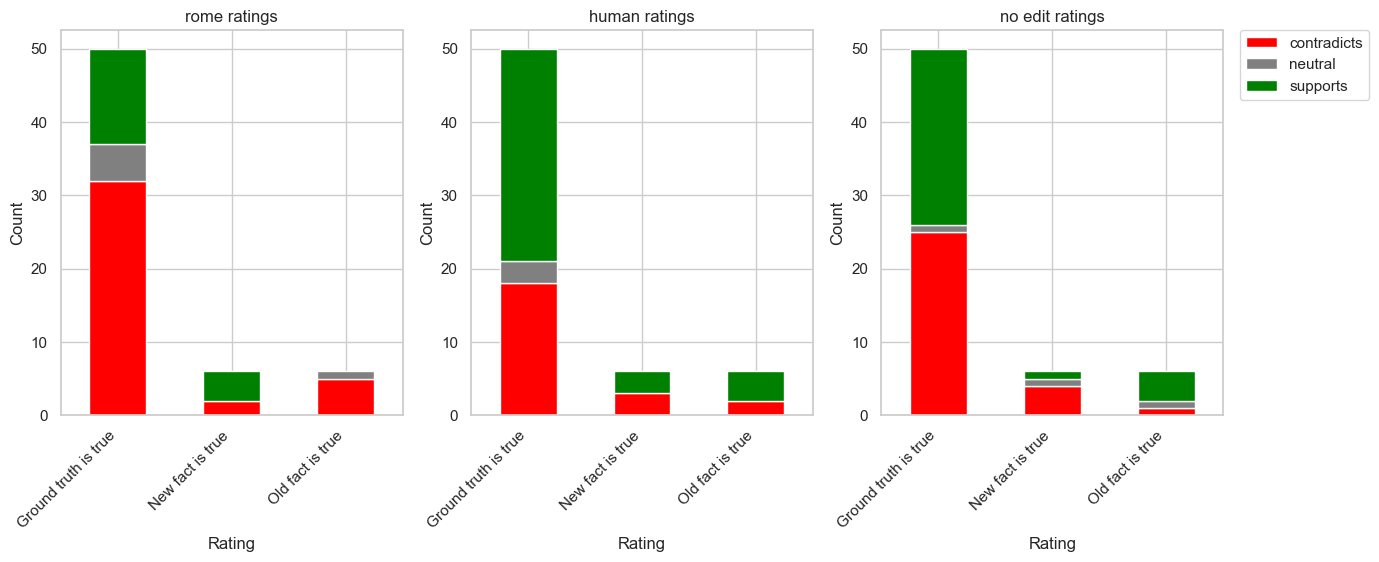

In [ ]:
# bar graph of rating per class per method
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# create three subplots for each method on one plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

annos_df_tmp = annos_df.loc[
    (annos_df['rater'] == 5)
]
for i, method in enumerate(annos_df_tmp['method'].unique()):
    ax = annos_df_tmp.loc[
        annos_df_tmp['method'] == method
    ].pivot_table(
        index=['question_type'],
        columns=['classification'],
        values='rater',
        aggfunc='count'
    ).plot(
        kind='bar',
        ax=axs[i],
        stacked=True,
        color=[
            'red', 'grey', 'green'
        ]
    )
    ax.set_title(f"{method.replace('_', ' ')} ratings")
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    # move legend outside of plot
    
    # delete other legends
    if i < 2:
        ax.get_legend().remove()
    else:
        ax.legend(
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            borderaxespad=0.
        )


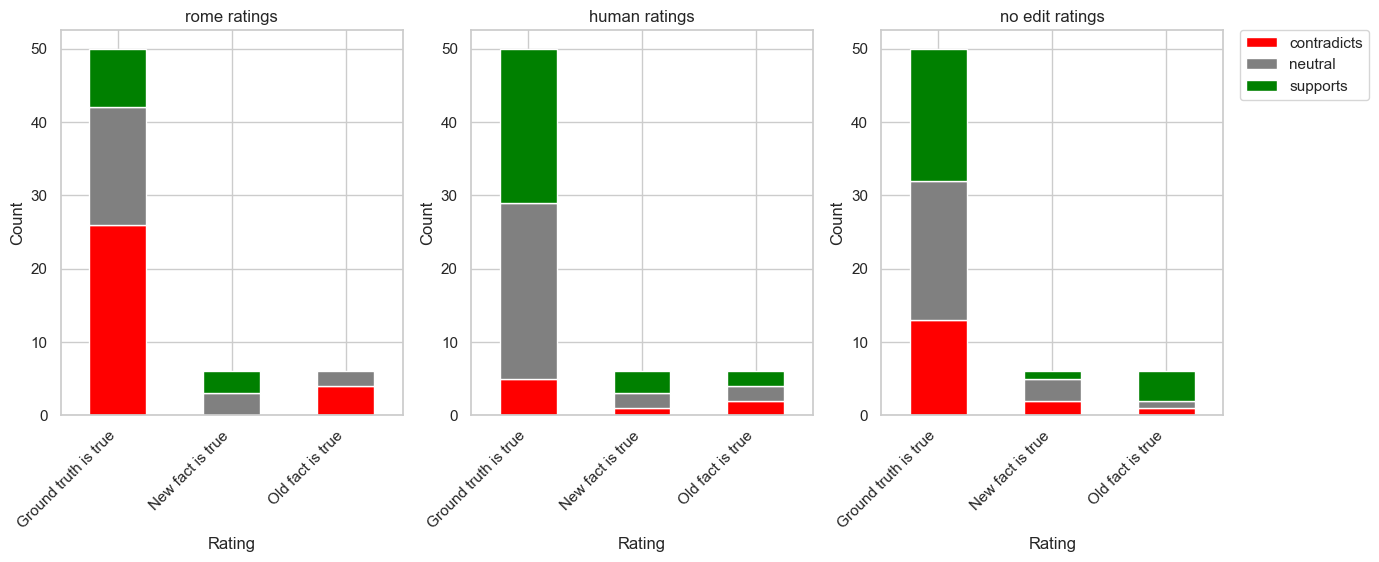

In [ ]:
# bar graph of rating per class per method
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# create three subplots for each method on one plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

annos_df_tmp = annos_df.loc[
    (annos_df['rater'] == 6)
]
for i, method in enumerate(annos_df_tmp['method'].unique()):
    ax = annos_df_tmp.loc[
        annos_df_tmp['method'] == method
    ].pivot_table(
        index=['question_type'],
        columns=['classification'],
        values='rater',
        aggfunc='count'
    ).plot(
        kind='bar',
        ax=axs[i],
        stacked=True,
        color=[
            'red', 'grey', 'green'
        ]
    )
    ax.set_title(f"{method.replace('_', ' ')} ratings")
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    # move legend outside of plot
    
    # delete other legends
    if i < 2:
        ax.get_legend().remove()
    else:
        ax.legend(
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            borderaxespad=0.
        )


In [ ]:
def row_wise_normalise(df):
    return df.div(df.sum(axis=1), axis=0)

annos_df_tmp = annos_df.loc[
    (annos_df['rater'] == 5)
]
count_df = annos_df_tmp.pivot_table(
    index=['method', 'question_type'],
    columns=['classification'],
    values='rater',
    aggfunc='count'
)

count_df = row_wise_normalise(count_df)
count_df.fillna(0).round(2)

classification                contradicts  neutral  supports
method  question_type                                       
human   Ground truth is true         0.36     0.06      0.58
        New fact is true             0.50     0.00      0.50
        Old fact is true             0.33     0.00      0.67
no_edit Ground truth is true         0.50     0.02      0.48
        New fact is true             0.67     0.17      0.17
        Old fact is true             0.17     0.17      0.67
rome    Ground truth is true         0.64     0.10      0.26
        New fact is true             0.33     0.00      0.67
        Old fact is true             0.83     0.17      0.00

In [ ]:
def row_wise_normalise(df):
    return df.div(df.sum(axis=1), axis=0)

annos_df_tmp = annos_df.loc[
    (annos_df['rater'] == 6)
]
count_df = annos_df_tmp.pivot_table(
    index=['method', 'question_type'],
    columns=['classification'],
    values='rater',
    aggfunc='count'
)

count_df = row_wise_normalise(count_df)
count_df.fillna(0).round(2)

classification                contradicts  neutral  supports
method  question_type                                       
human   Ground truth is true         0.10     0.48      0.42
        New fact is true             0.17     0.33      0.50
        Old fact is true             0.33     0.33      0.33
no_edit Ground truth is true         0.26     0.38      0.36
        New fact is true             0.33     0.50      0.17
        Old fact is true             0.17     0.17      0.67
rome    Ground truth is true         0.52     0.32      0.16
        New fact is true             0.00     0.50      0.50
        Old fact is true             0.67     0.33      0.00

In [ ]:
# Characterize highlighted sentences by type and count
annos_df['highlighted_sentences_len'] = annos_df['highlighted_sentences'].fillna('').apply(
    lambda x: len(x)
)
annos_df_tmp = annos_df.loc[
    (annos_df['rater'] == 5)
]
annos_df_tmp.pivot_table(
    index=['method', 'question_type'],
    columns=['classification'],
    values='highlighted_sentences_len',
    aggfunc='sum'
).round(2).fillna(0)[[
    'supports', 'contradicts'
]]


classification                supports  contradicts
method  question_type                              
human   Ground truth is true      33.0          0.0
        New fact is true           2.0          0.0
        Old fact is true           2.0          0.0
no_edit Ground truth is true      31.0          2.0
        New fact is true           1.0          2.0
        Old fact is true           3.0          0.0
rome    Ground truth is true      14.0          6.0
        New fact is true           7.0          0.0
        Old fact is true           0.0          0.0

In [ ]:
# Characterize highlighted sentences by type and count
annos_df['highlighted_sentences_len'] = annos_df['highlighted_sentences'].fillna('').apply(
    lambda x: len(x)
)
annos_df_tmp = annos_df.loc[
    (annos_df['rater'] == 6)
]
annos_df_tmp.pivot_table(
    index=['method', 'question_type'],
    columns=['classification'],
    values='highlighted_sentences_len',
    aggfunc='sum'
).round(2).fillna(0)[[
    'supports', 'contradicts'
]]


classification                supports  contradicts
method  question_type                              
human   Ground truth is true      29.0          3.0
        New fact is true           5.0          2.0
        Old fact is true           3.0          2.0
no_edit Ground truth is true      24.0         14.0
        New fact is true           1.0          2.0
        Old fact is true           4.0          1.0
rome    Ground truth is true      11.0         42.0
        New fact is true           8.0          0.0
        Old fact is true           0.0          9.0

### Inter rater reliability

In [ ]:
# cohens kappa
# this will only apply to the sample test unless we do two raters
import krippendorff as kd
from sklearn.metrics import cohen_kappa_score

ck = cohen_kappa_score(
    raters[5],
    raters[6]
)

# change to numbers for krippendorff
rater_1 = [rating_to_number[r] for r in raters[5]]
rater_2 = [rating_to_number[r] for r in raters[6]]
k = kd.alpha([
    rater_1,
    rater_2
])

print(f"""
Coehn's Kappa: {ck}
Krippendorff's Alpha: {k}  
""")


Coehn's Kappa: 0.3057372924006039
Krippendorff's Alpha: 0.452781926811053  



In [ ]:
# cohens kappa
# this will only apply to the sample test unless we do two raters
import krippendorff as kd
from sklearn.metrics import cohen_kappa_score

ck = cohen_kappa_score(
    raters[1],
    raters[5]
)

# change to numbers for krippendorff
rater_1 = [rating_to_number[r] for r in raters[1]]
rater_2 = [rating_to_number[r] for r in raters[5]]
k = kd.alpha([
    rater_1,
    rater_2
])

print(f"""
Coehn's Kappa: {ck}
Krippendorff's Alpha: {k}  
""")


Coehn's Kappa: 0.2473021582733813
Krippendorff's Alpha: 0.36400615974663686  



In [ ]:
# calculate agreement between rater_1 and rater_2
from sklearn.metrics import accuracy_score
accuracy_score(rater_1, rater_2)

0.46774193548387094

In [ ]:
# cohens kappa
# this will only apply to the sample test unless we do two raters
import krippendorff as kd
from sklearn.metrics import cohen_kappa_score

ck = cohen_kappa_score(
    raters[1],
    raters[6]
)

# change to numbers for krippendorff
rater_1 = [rating_to_number[r] for r in raters[1]]
rater_2 = [rating_to_number[r] for r in raters[6]]
k = kd.alpha([
    rater_1,
    rater_2
])

print(f"""
Coehn's Kappa: {ck}
Krippendorff's Alpha: {k}  
""")


Coehn's Kappa: 0.5488224397988886
Krippendorff's Alpha: 0.4896321070234113  



In [ ]:
# calculate agreement between rater_1 and rater_2
from sklearn.metrics import accuracy_score
accuracy_score(rater_1, rater_2)

0.7043010752688172

### Statistical significance

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

rating_to_number = {
    'supports': 0,
    'neutral': 1,
    'contradicts': 2
}
annos_df_tmp = annos_df.loc[
    (annos_df['rater'] == 5)
]
# Sample predicted labels for two machine learning systems
for method_1 in annos_df_tmp.method.unique():
    for method_2 in annos_df_tmp.method.unique():
        if method_1 == method_2:
            continue
        for question_type in annos_df_tmp.question_type.unique():
            system1_labels = annos_df_tmp.loc[
                (annos_df_tmp['method'] == method_1) & (annos_df_tmp['question_type'] == question_type)
            ]['classification'].values
            system1_labels = [
                rating_to_number[anno] for anno in system1_labels
            ]
            system2_labels = annos_df_tmp.loc[
                (annos_df_tmp['method'] == method_2) & (annos_df_tmp['question_type'] == question_type)
            ]['classification'].values
            system2_labels = [
                rating_to_number[anno] for anno in system2_labels
            ]
            # Create contingency table with bincount
            contingency_table = np.array([
                np.bincount(system1_labels, minlength=3),
                np.bincount(system2_labels, minlength=3)
            ])
            # drop column if there are no labels
            contingency_table = contingency_table[:, contingency_table.sum(axis=0) > 0]

            # Perform the Chi-squared test
            chi2, p, _, _ = chi2_contingency(contingency_table)


            # Output the results
            

            # Compare the p-values to a significance level (e.g., 0.05)
            alpha = 0.05
            if p < alpha:
                print(f"Results for {method_1} and {method_2} for {question_type}")
                print(f"Chi-squared statistic: {chi2}")
                print(f"P-value for Chi-squared test: {p}")
                print("Chi-squared test indicates a significant difference between the systems.")


Results for rome and human for Old fact is true
Chi-squared statistic: 6.285714285714286
P-value for Chi-squared test: 0.0431593092614526
Chi-squared test indicates a significant difference between the systems.
Results for rome and human for Ground truth is true
Chi-squared statistic: 10.515238095238097
P-value for Chi-squared test: 0.005207689229459606
Chi-squared test indicates a significant difference between the systems.
Results for rome and no_edit for Old fact is true
Chi-squared statistic: 6.666666666666666
P-value for Chi-squared test: 0.0356739933472524
Chi-squared test indicates a significant difference between the systems.
Results for rome and no_edit for Ground truth is true
Chi-squared statistic: 6.796586059743953
P-value for Chi-squared test: 0.033430285783532195
Chi-squared test indicates a significant difference between the systems.
Results for human and rome for Old fact is true
Chi-squared statistic: 6.285714285714286
P-value for Chi-squared test: 0.0431593092614526
C

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

rating_to_number = {
    'supports': 0,
    'neutral': 1,
    'contradicts': 2
}
annos_df_tmp = annos_df.loc[
    (annos_df['rater'] == 6)
]
# Sample predicted labels for two machine learning systems
for method_1 in annos_df_tmp.method.unique():
    for method_2 in annos_df_tmp.method.unique():
        if method_1 == method_2:
            continue
        for question_type in annos_df_tmp.question_type.unique():
            system1_labels = annos_df_tmp.loc[
                (annos_df_tmp['method'] == method_1) & (annos_df_tmp['question_type'] == question_type)
            ]['classification'].values
            system1_labels = [
                rating_to_number[anno] for anno in system1_labels
            ]
            system2_labels = annos_df_tmp.loc[
                (annos_df_tmp['method'] == method_2) & (annos_df_tmp['question_type'] == question_type)
            ]['classification'].values
            system2_labels = [
                rating_to_number[anno] for anno in system2_labels
            ]
            # Create contingency table with bincount
            contingency_table = np.array([
                np.bincount(system1_labels, minlength=3),
                np.bincount(system2_labels, minlength=3)
            ])
            # drop column if there are no labels
            contingency_table = contingency_table[:, contingency_table.sum(axis=0) > 0]

            # Perform the Chi-squared test
            chi2, p, _, _ = chi2_contingency(contingency_table)


            # Output the results
            

            # Compare the p-values to a significance level (e.g., 0.05)
            alpha = 0.05
            if p < alpha:
                print(f"Results for {method_1} and {method_2} for {question_type}")
                print(f"Chi-squared statistic: {chi2}")
                print(f"P-value for Chi-squared test: {p}")
                print("Chi-squared test indicates a significant difference between the systems.")


Results for rome and human for Ground truth is true
Chi-squared statistic: 21.653392658509453
P-value for Chi-squared test: 1.9862116594818324e-05
Chi-squared test indicates a significant difference between the systems.
Results for rome and no_edit for Old fact is true
Chi-squared statistic: 6.133333333333334
P-value for Chi-squared test: 0.04657615022238341
Chi-squared test indicates a significant difference between the systems.
Results for rome and no_edit for Ground truth is true
Chi-squared statistic: 8.436630036630035
P-value for Chi-squared test: 0.014723432329336974
Chi-squared test indicates a significant difference between the systems.
Results for human and rome for Ground truth is true
Chi-squared statistic: 21.653392658509453
P-value for Chi-squared test: 1.9862116594818324e-05
Chi-squared test indicates a significant difference between the systems.
Results for no_edit and rome for Old fact is true
Chi-squared statistic: 6.133333333333334
P-value for Chi-squared test: 0.0465

## Convergent Measures Analysis between Machine Survey and Machine Annotation

In [ ]:

# hve to think through merging on sample_id and question 

survey_df_gpt35.question.unique()

survey_q_to_anno_q = {
    # I should also try old_fact_and
    'The main passage is written as if the new fact is true': 'new_fact_and_main_passage',
    'The related passage does not contradict the new fact': 'new_fact_and_related_passage',
    'Ignoring the new fact, most of the old facts are still true in the main passage.': 'ground_truth_and_main_passage',
    'Ignoring the new fact, most of the old facts are still true in the related passage.': 'ground_truth_and_related_passage',
}
anno_q_to_survey_q = {
    v: k for k, v in survey_q_to_anno_q.items()
}
responses_filtered_df = survey_df_gpt35.loc[
    survey_df_gpt35['question'].isin(
        list(survey_q_to_anno_q.keys())
    )
]
responses_filtered_df['anno_question'] = responses_filtered_df['question'].apply(
    lambda x: survey_q_to_anno_q[x]
)
responses_filtered_df['response'] = responses_filtered_df['response'].fillna(4)
annos_df_tmp = annos_df.loc[
    (annos_df['rater'] == 5)
]
annos_rename = annos_df_tmp.rename(columns={'label': 'anno_question'})
# merge on sample_id, method and question
merged_df = pd.merge(
    responses_filtered_df,
    annos_rename,
    on=['sample_id', 'method', 'anno_question'],
)
merged_df.dropna(subset=['classification'], inplace=True)
merged_df['highlighted_sentences_len'] = merged_df['highlighted_sentences'].fillna('').apply(
    lambda x: len(x)
)
rating_to_number = {
    'supports': 2,
    'neutral': 1,
    'contradicts': -1
}
merged_df['classification'] = merged_df.apply(
    lambda x: rating_to_number[x['classification']], # * (x['highlighted_sentences_len'] + 1), multiplier for highlighted sentences
    axis=1
)

KendalltauResult(correlation=-0.02097239565511277, pvalue=0.7750152765010752)
Factual consistency
KendalltauResult(correlation=-0.046401470505856544, pvalue=0.5434119001047526)
Edit consistency
KendalltauResult(correlation=0.4472135954999579, pvalue=0.1380107375686596)
human
KendalltauResult(correlation=-0.2816819138087803, pvalue=0.03365915657665181)
no_edit
KendalltauResult(correlation=-0.07397097214819538, pvalue=0.5900249704566665)
rome
KendalltauResult(correlation=0.188057496612841, pvalue=0.15381112400054012)
Factual consistency human
KendalltauResult(correlation=-0.29092310402113425, pvalue=0.03505016034106856)
Factual consistency no_edit
KendalltauResult(correlation=-0.12000453711930896, pvalue=0.40098465779135173)
Factual consistency rome
KendalltauResult(correlation=0.09948283439106753, pvalue=0.47546268665750113)
Edit consistency human
KendalltauResult(correlation=nan, pvalue=nan)
Edit consistency no_edit
KendalltauResult(correlation=0.5773502691896258, pvalue=0.317310507862

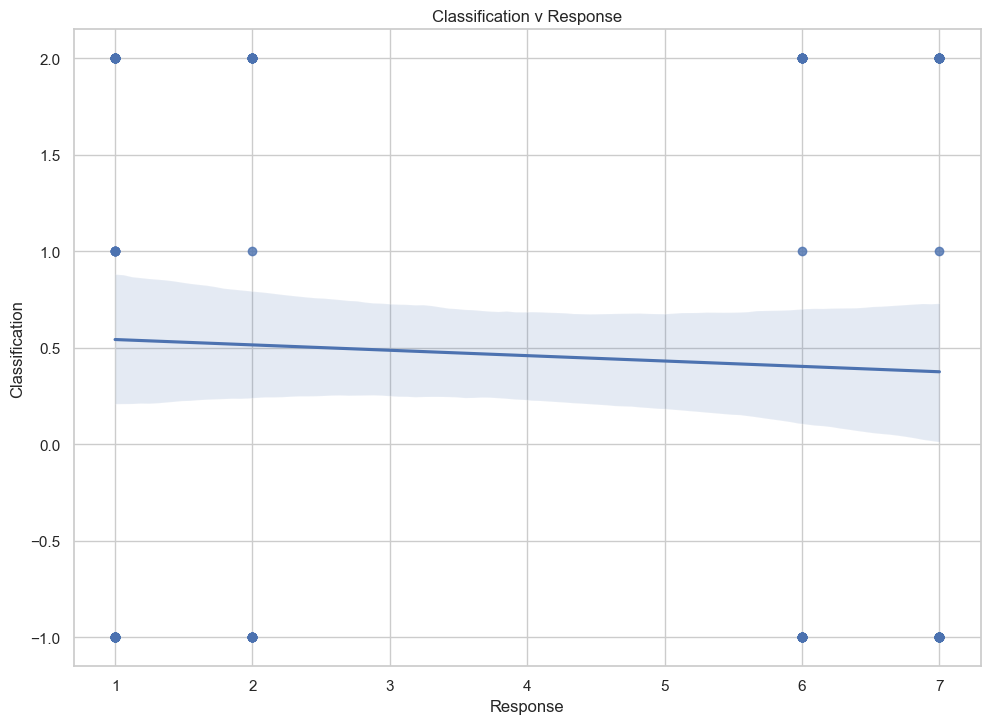

In [ ]:
# scatter plot on classification v response
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# increase size of plot
ax = sns.regplot(x=merged_df['response'], y=merged_df['classification'])
ax.set_title('Classification v Response')
ax.set_ylabel('Classification')
ax.set_xlabel('Response')

print(
    stats.kendalltau(merged_df['response'], merged_df['classification'])
)

# kendall tau
import scipy.stats as stats
for question_type in merged_df.question_type_x.unique():
    print(question_type)
    print(stats.kendalltau(merged_df.loc[merged_df['question_type_x'] == question_type]['response'], merged_df.loc[merged_df['question_type_x'] == question_type]['classification']))

for method in merged_df.method.unique():
    print(method)
    print(stats.kendalltau(merged_df.loc[merged_df['method'] == method]['response'], merged_df.loc[merged_df['method'] == method]['classification']))

for question_type in merged_df.question_type_x.unique():
    for method in merged_df.method.unique():
        print(question_type, method)
        print(stats.kendalltau(merged_df.loc[(merged_df['question_type_x'] == question_type) & (merged_df['method'] == method)]['response'], merged_df.loc[(merged_df['question_type_x'] == question_type) & (merged_df['method'] == method)]['classification']))

In [ ]:

# hve to think through merging on sample_id and question 

survey_df_gpt4.question.unique()

survey_q_to_anno_q = {
    # I should also try old_fact_and
    'The main passage is written as if the new fact is true': 'new_fact_and_main_passage',
    'The related passage does not contradict the new fact': 'new_fact_and_related_passage',
    'Ignoring the new fact, most of the old facts are still true in the main passage.': 'ground_truth_and_main_passage',
    'Ignoring the new fact, most of the old facts are still true in the related passage.': 'ground_truth_and_related_passage',
}
anno_q_to_survey_q = {
    v: k for k, v in survey_q_to_anno_q.items()
}
responses_filtered_df = survey_df_gpt4.loc[
    survey_df_gpt4['question'].isin(
        list(survey_q_to_anno_q.keys())
    )
]
responses_filtered_df['anno_question'] = responses_filtered_df['question'].apply(
    lambda x: survey_q_to_anno_q[x]
)
responses_filtered_df['response'] = responses_filtered_df['response'].fillna(4)
annos_df_tmp = annos_df.loc[
    (annos_df['rater'] == 6)
]
annos_rename = annos_df_tmp.rename(columns={'label': 'anno_question'})
# merge on sample_id, method and question
merged_df = pd.merge(
    responses_filtered_df,
    annos_rename,
    on=['sample_id', 'method', 'anno_question'],
)
merged_df.dropna(subset=['classification'], inplace=True)
merged_df['highlighted_sentences_len'] = merged_df['highlighted_sentences'].fillna('').apply(
    lambda x: len(x)
)
rating_to_number = {
    'supports': 2,
    'neutral': 1,
    'contradicts': -1
}
merged_df['classification'] = merged_df.apply(
    lambda x: rating_to_number[x['classification']], # * (x['highlighted_sentences_len'] + 1), multiplier for highlighted sentences
    axis=1
)

KendalltauResult(correlation=0.10122678056315616, pvalue=0.16818471259389933)
Factual consistency
KendalltauResult(correlation=0.10364956542780034, pvalue=0.1774180127562477)
Edit consistency
KendalltauResult(correlation=0.06366070140792304, pvalue=0.8197946411860916)
human
KendalltauResult(correlation=-0.34549525586610913, pvalue=0.011837731201817714)
no_edit
KendalltauResult(correlation=-0.02043376122043745, pvalue=0.8785593151241511)
rome
KendalltauResult(correlation=0.0516917790962999, pvalue=0.690344062542522)
Factual consistency human
KendalltauResult(correlation=-0.34978878254891727, pvalue=0.01484107570180044)
Factual consistency no_edit
KendalltauResult(correlation=-0.08350803481852663, pvalue=0.5536453484946653)
Factual consistency rome
KendalltauResult(correlation=-0.058959416318336545, pvalue=0.6704908276132167)
Edit consistency human
KendalltauResult(correlation=nan, pvalue=nan)
Edit consistency no_edit
KendalltauResult(correlation=0.5163977794943223, pvalue=0.345778586151

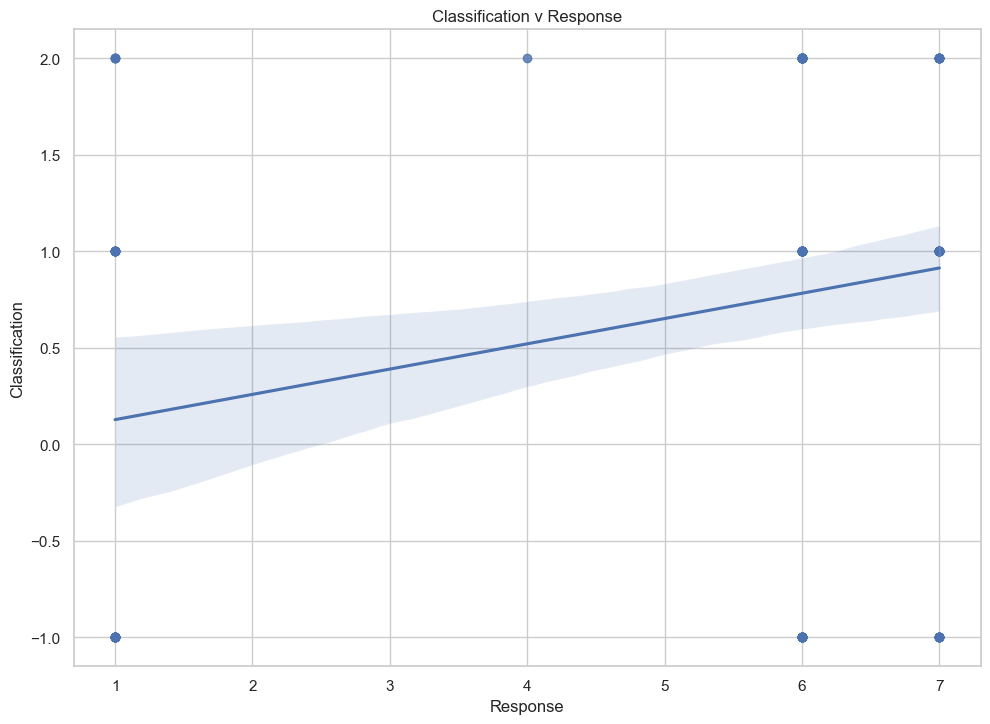

In [ ]:
# scatter plot on classification v response
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# increase size of plot
ax = sns.regplot(x=merged_df['response'], y=merged_df['classification'])
ax.set_title('Classification v Response')
ax.set_ylabel('Classification')
ax.set_xlabel('Response')

print(
    stats.kendalltau(merged_df['response'], merged_df['classification'])
)

# kendall tau
import scipy.stats as stats
for question_type in merged_df.question_type_x.unique():
    print(question_type)
    print(stats.kendalltau(merged_df.loc[merged_df['question_type_x'] == question_type]['response'], merged_df.loc[merged_df['question_type_x'] == question_type]['classification']))

for method in merged_df.method.unique():
    print(method)
    print(stats.kendalltau(merged_df.loc[merged_df['method'] == method]['response'], merged_df.loc[merged_df['method'] == method]['classification']))

for question_type in merged_df.question_type_x.unique():
    for method in merged_df.method.unique():
        print(question_type, method)
        print(stats.kendalltau(merged_df.loc[(merged_df['question_type_x'] == question_type) & (merged_df['method'] == method)]['response'], merged_df.loc[(merged_df['question_type_x'] == question_type) & (merged_df['method'] == method)]['classification']))